In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import glob
import numpy as np
import random
import math
from math import sqrt
import hashlib
import numpy as np
import matplotlib.animation as animation
import itertools
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches
import transformations as t
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.transform import Rotation
from IPython import display
import warnings
import scipy.stats
from heapq import merge
warnings.simplefilter(action='ignore', category=FutureWarning)

/home/nicola/phd/studyanalysis/transformations.py:1924: UserWarning: No module named '_transformations'
  warnings.warn(str(exc))


## Create DF for VICON data

In [2]:
# csv_files = Path("/home/nicola/gameapp/data/studyanalysis/").glob("study4H.csv")
# data_df = pd.concat([pd.read_csv(fp) for fp in file])

# file = Path("study1H.csv")
# GROUP=file.name.split("H")[0]
# d_df = pd.read_csv(file)
# d_df['GROUP'] = GROUP

# file2 = Path("study2H.csv")
# GROUP2=file2.name.split("H")[0]
# d_df2 = pd.read_csv(file2)
# d_df2['GROUP'] = GROUP2


# data_df = d_df.append(d_df2, ignore_index=True)
# data_df = pd.concat([d_df, d_df2], ignore_index=True, sort=False)

csv_files = Path("").glob("*H.csv")
data_df = pd.concat([pd.read_csv(fp).assign(GROUP=fp.name.split("H")[0]) for fp in csv_files], ignore_index=True)
# data_df['GROUP'] = 

In [3]:
# data_df['1RZ'] = np.radians(data_df['1RZ'])-np.pi/2
# data_df['2RZ'] = np.radians(data_df['2RZ'])-np.pi/2
# data_df['3RZ'] = np.radians(data_df['3RZ'])-np.pi/2
# data_df['4RZ'] = np.radians(data_df['4RZ'])-np.pi/2
# data_df['5RZ'] = np.radians(data_df['5RZ'])-np.pi/2

data_df['1RZ'] = data_df['1RZ'] - 90
data_df['2RZ'] = data_df['2RZ'] - 90
data_df['3RZ'] = data_df['3RZ'] + 90
data_df['4RZ'] = data_df['4RZ'] - 90
data_df['5RZ'] = data_df['5RZ'] - 90

data_df

Frame  Sub Frame       1RX       1RY        1RZ          1TX  \
0           1          0 -1.428056 -0.516452 -87.220340 -1556.672241   
1           2          0 -1.428784 -0.509176 -87.229850 -1555.468994   
2           3          0 -1.427032 -0.502205 -87.237812 -1554.560181   
3           4          0 -0.404298  0.122471 -90.783539  -244.748032   
4           5          0 -0.404625  0.123084 -90.782952  -244.493820   
...       ...        ...       ...       ...        ...          ...   
384290  80114          0 -0.150724  0.077843 -89.561956  2195.132812   
384291  80115          0 -0.150689  0.077989 -89.561920  2195.147949   
384292  80116          0 -0.150761  0.077891 -89.561895  2195.136475   
384293  80117          0 -0.150686  0.077894 -89.561987  2195.132812   
384294  80118          0 -0.150707  0.077887 -89.561948  2195.157959   

                1TY          1TZ       2RX       2RY  ...          4TX  \
0       1027.392090  1789.757812       NaN       NaN  ...          NaN   
1       1026.220703  1789.684937       NaN       NaN  ...          NaN   
2       1024.966431  1789.598145       NaN       NaN  ...          NaN   
3       1991.542969  1713.991455 -1.578893 -0.802824  ... -2092.732666   
4       1991.572510  1713.996704 -1.588340 -0.816280  ... -2092.596924   
...             ...          ...       ...       ...  ...          ...   
384290 -1438.786865  1068.234619  0.409880 -3.846665  ...  1949.711304   
384291 -1438.802124  1068.252686  0.406747 -3.846874  ...  1949.705444   
384292 -1438.787964  1068.242188  0.405425 -3.845295  ...  1949.700439   
384293 -1438.788452  1068.236450  0.407506 -3.846482  ...  1949.710205   
384294 -1438.820312  1068.266724  0.409008 -3.846727  ...  1949.689697   

                4TY          4TZ       5RX       5RY        5RZ          5TX  \
0               NaN          NaN       NaN       NaN        NaN          NaN   
1               NaN          NaN       NaN       NaN        NaN          NaN   
2               NaN          NaN       NaN       NaN        NaN          NaN   
3       1562.113647  1603.237915  0.037721 -0.071159 -88.340662 -1558.312988   
4       1562.220825  1603.054688  0.038422 -0.062089 -88.350924 -1557.191650   
...             ...          ...       ...       ...        ...          ...   
384290 -1842.257202  1063.357056 -0.003808 -0.126373 -89.876357   663.993103   
384291 -1842.252808  1063.356323 -0.003754 -0.126231 -89.876319   663.992859   
384292 -1842.249268  1063.353149 -0.003746 -0.126173 -89.876350   663.987854   
384293 -1842.260132  1063.359741 -0.003903 -0.126301 -89.876301   663.994568   
384294 -1842.246460  1063.345215 -0.003805 -0.126234 -89.876352   663.986206   

                5TY          5TZ   GROUP  
0               NaN          NaN  study3  
1               NaN          NaN  study3  
2               NaN          NaN  study3  
3       1059.743774  1826.611938  study3  
4       1058.191284  1827.007690  study3  
...             ...          ...     ...  
384290 -2095.846924   882.212646  study6  
384291 -2095.852539   882.222839  study6  
384292 -2095.842529   882.218140  study6  
384293 -2095.847656   882.218689  study6  
384294 -2095.847900   882.214844  study6  

[384295 rows x 33 columns]

In [4]:
data_df.columns
data_df

Frame  Sub Frame       1RX       1RY        1RZ          1TX  \
0           1          0 -1.428056 -0.516452 -87.220340 -1556.672241   
1           2          0 -1.428784 -0.509176 -87.229850 -1555.468994   
2           3          0 -1.427032 -0.502205 -87.237812 -1554.560181   
3           4          0 -0.404298  0.122471 -90.783539  -244.748032   
4           5          0 -0.404625  0.123084 -90.782952  -244.493820   
...       ...        ...       ...       ...        ...          ...   
384290  80114          0 -0.150724  0.077843 -89.561956  2195.132812   
384291  80115          0 -0.150689  0.077989 -89.561920  2195.147949   
384292  80116          0 -0.150761  0.077891 -89.561895  2195.136475   
384293  80117          0 -0.150686  0.077894 -89.561987  2195.132812   
384294  80118          0 -0.150707  0.077887 -89.561948  2195.157959   

                1TY          1TZ       2RX       2RY  ...          4TX  \
0       1027.392090  1789.757812       NaN       NaN  ...          NaN   
1       1026.220703  1789.684937       NaN       NaN  ...          NaN   
2       1024.966431  1789.598145       NaN       NaN  ...          NaN   
3       1991.542969  1713.991455 -1.578893 -0.802824  ... -2092.732666   
4       1991.572510  1713.996704 -1.588340 -0.816280  ... -2092.596924   
...             ...          ...       ...       ...  ...          ...   
384290 -1438.786865  1068.234619  0.409880 -3.846665  ...  1949.711304   
384291 -1438.802124  1068.252686  0.406747 -3.846874  ...  1949.705444   
384292 -1438.787964  1068.242188  0.405425 -3.845295  ...  1949.700439   
384293 -1438.788452  1068.236450  0.407506 -3.846482  ...  1949.710205   
384294 -1438.820312  1068.266724  0.409008 -3.846727  ...  1949.689697   

                4TY          4TZ       5RX       5RY        5RZ          5TX  \
0               NaN          NaN       NaN       NaN        NaN          NaN   
1               NaN          NaN       NaN       NaN        NaN          NaN   
2               NaN          NaN       NaN       NaN        NaN          NaN   
3       1562.113647  1603.237915  0.037721 -0.071159 -88.340662 -1558.312988   
4       1562.220825  1603.054688  0.038422 -0.062089 -88.350924 -1557.191650   
...             ...          ...       ...       ...        ...          ...   
384290 -1842.257202  1063.357056 -0.003808 -0.126373 -89.876357   663.993103   
384291 -1842.252808  1063.356323 -0.003754 -0.126231 -89.876319   663.992859   
384292 -1842.249268  1063.353149 -0.003746 -0.126173 -89.876350   663.987854   
384293 -1842.260132  1063.359741 -0.003903 -0.126301 -89.876301   663.994568   
384294 -1842.246460  1063.345215 -0.003805 -0.126234 -89.876352   663.986206   

                5TY          5TZ   GROUP  
0               NaN          NaN  study3  
1               NaN          NaN  study3  
2               NaN          NaN  study3  
3       1059.743774  1826.611938  study3  
4       1058.191284  1827.007690  study3  
...             ...          ...     ...  
384290 -2095.846924   882.212646  study6  
384291 -2095.852539   882.222839  study6  
384292 -2095.842529   882.218140  study6  
384293 -2095.847656   882.218689  study6  
384294 -2095.847900   882.214844  study6  

[384295 rows x 33 columns]

##### Distance - plot distance from person to person

In [5]:
df_dist= pd.DataFrame()  

print(data_df['Frame'].values)
OneTX, OneTY, OneTZ = data_df["1TX"], data_df["1TY"], data_df["1TZ"]
TwoTX, TwoTY, TwoTZ = data_df["2TX"], data_df["2TY"], data_df["2TZ"]
ThreeTX, ThreeTY, ThreeTZ = data_df["3TX"], data_df["3TY"], data_df["3TZ"]
FourTX, FourTY, FourTZ = data_df["4TX"], data_df["4TY"], data_df["4TZ"]
FiveTX, FiveTY, FiveTZ = data_df["5TX"], data_df["5TY"], data_df["5TZ"]

df_dist["distance_1_2"] = np.power(np.power(OneTX-TwoTX,2) + np.power(OneTY-TwoTY,2), 0.5)
df_dist["distance_1_3"] = np.power(np.power(OneTX-ThreeTX,2) + np.power(OneTY-ThreeTY,2), 0.5)
df_dist["distance_1_4"] = np.power(np.power(OneTX-FourTX,2) + np.power(OneTY-FourTY,2), 0.5)
df_dist["distance_1_5"] = np.power(np.power(OneTX-FiveTX,2) + np.power(OneTY-FiveTY,2), 0.5)

df_dist["distance_2_1"] = np.power(np.power(TwoTX-OneTX,2) + np.power(TwoTY-OneTY,2), 0.5)
df_dist["distance_2_3"] = np.power(np.power(TwoTX-ThreeTX,2) + np.power(TwoTY-ThreeTY,2), 0.5)
df_dist["distance_2_4"] = np.power(np.power(TwoTX-FourTX,2) + np.power(TwoTY-FourTY,2), 0.5)
df_dist["distance_2_5"] = np.power(np.power(TwoTX-FiveTX,2) + np.power(TwoTY-FiveTY,2), 0.5)

df_dist["distance_3_1"] = np.power(np.power(ThreeTX-OneTX,2) + np.power(ThreeTY-OneTY,2), 0.5)
df_dist["distance_3_2"] = np.power(np.power(ThreeTX-TwoTX,2) + np.power(ThreeTY-TwoTY,2), 0.5)
df_dist["distance_3_4"] = np.power(np.power(ThreeTX-FourTX,2) + np.power(ThreeTY-FourTY,2), 0.5)
df_dist["distance_3_5"] = np.power(np.power(ThreeTX-FiveTX,2) + np.power(ThreeTY-FiveTY,2), 0.5)

df_dist["distance_4_1"] = np.power(np.power(FourTX-OneTX,2) + np.power(FourTY-OneTY,2), 0.5)
df_dist["distance_4_2"] = np.power(np.power(FourTX-TwoTX,2) + np.power(FourTY-TwoTY,2), 0.5)
df_dist["distance_4_3"] = np.power(np.power(FourTX-ThreeTX,2) + np.power(FourTY-ThreeTY,2), 0.5)
df_dist["distance_4_5"] = np.power(np.power(FourTX-FiveTX,2) + np.power(FourTY-FiveTY,2), 0.5)

df_dist["distance_5_1"] = np.power(np.power(FiveTX-OneTX,2) + np.power(FiveTY-OneTY,2), 0.5)
df_dist["distance_5_2"] = np.power(np.power(FiveTX-TwoTX,2) + np.power(FiveTY-TwoTY,2), 0.5)
df_dist["distance_5_3"] = np.power(np.power(FiveTX-ThreeTX,2) + np.power(FiveTY-ThreeTY,2), 0.5)
df_dist["distance_5_4"] = np.power(np.power(FiveTX-FourTX,2) + np.power(FiveTY-FourTY,2), 0.5)

# df_dist=(df_dist-df_dist.mean())/df_dist.std()
df_dist=(df_dist-df_dist.min())/(df_dist.max()-df_dist.min())
df_dist['Frame'] = df_dist.index
df_dist['GROUP'] = data_df['GROUP']
df_dist["Frame2"] = data_df['Frame'].astype(int)

df_dist

[    1     2     3 ... 80116 80117 80118]


distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0                NaN      0.188024           NaN           NaN           NaN   
1                NaN      0.187972           NaN           NaN           NaN   
2                NaN      0.187990           NaN           NaN           NaN   
3           0.270465      0.180325      0.281025      0.434053      0.270465   
4           0.270449      0.180555      0.281040      0.434110      0.270449   
...              ...           ...           ...           ...           ...   
384290      0.050720      0.064382      0.069926      0.449102      0.050720   
384291      0.050716      0.064384      0.069925      0.449104      0.050716   
384292      0.050717      0.064382      0.069926      0.449103      0.050717   
384293      0.050721      0.064383      0.069926      0.449101      0.050721   
384294      0.050716      0.064384      0.069924      0.449106      0.050716   

        distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0                NaN           NaN           NaN      0.188024           NaN   
1                NaN           NaN           NaN      0.187972           NaN   
2                NaN           NaN           NaN      0.187990           NaN   
3           0.252455      0.005428      0.104478      0.180325      0.252455   
4           0.252601      0.005488      0.104812      0.180555      0.252601   
...              ...           ...           ...           ...           ...   
384290      0.068123      0.035554      0.225305      0.064382      0.068123   
384291      0.068123      0.035555      0.225306      0.064384      0.068123   
384292      0.068124      0.035557      0.225308      0.064382      0.068124   
384293      0.068129      0.035556      0.225307      0.064383      0.068129   
384294      0.068126      0.035558      0.225308      0.064384      0.068126   

        ...  distance_4_2  distance_4_3  distance_4_5  distance_5_1  \
0       ...           NaN           NaN           NaN           NaN   
1       ...           NaN           NaN           NaN           NaN   
2       ...           NaN           NaN           NaN           NaN   
3       ...      0.005428      0.262880      0.110794      0.434053   
4       ...      0.005488      0.263004      0.111075      0.434110   
...     ...           ...           ...           ...           ...   
384290  ...      0.035554      0.055650      0.198219      0.449102   
384291  ...      0.035555      0.055649      0.198218      0.449104   
384292  ...      0.035557      0.055650      0.198218      0.449103   
384293  ...      0.035556      0.055654      0.198218      0.449101   
384294  ...      0.035558      0.055649      0.198217      0.449106   

        distance_5_2  distance_5_3  distance_5_4   Frame   GROUP  Frame2  
0                NaN           NaN           NaN       0  study3       1  
1                NaN           NaN           NaN       1  study3       2  
2                NaN           NaN           NaN       2  study3       3  
3           0.104478      0.180999      0.110794       3  study3       4  
4           0.104812      0.180883      0.111075       4  study3       5  
...              ...           ...           ...     ...     ...     ...  
384290      0.225305      0.241155      0.198219  384290  study6   80114  
384291      0.225306      0.241156      0.198218  384291  study6   80115  
384292      0.225308      0.241156      0.198218  384292  study6   80116  
384293      0.225307      0.241154      0.198218  384293  study6   80117  
384294      0.225308      0.241158      0.198217  384294  study6   80118  

[384295 rows x 23 columns]

### Plot location

58975    -1442.157959
58976    -1442.608643
58977    -1443.224365
58978    -1443.643066
58979    -1443.928589
             ...     
108284    1019.692566
108285    1528.373535
108286    1527.615112
108287    1527.082031
108288    1526.210327
Name: 5TX, Length: 49314, dtype: float64


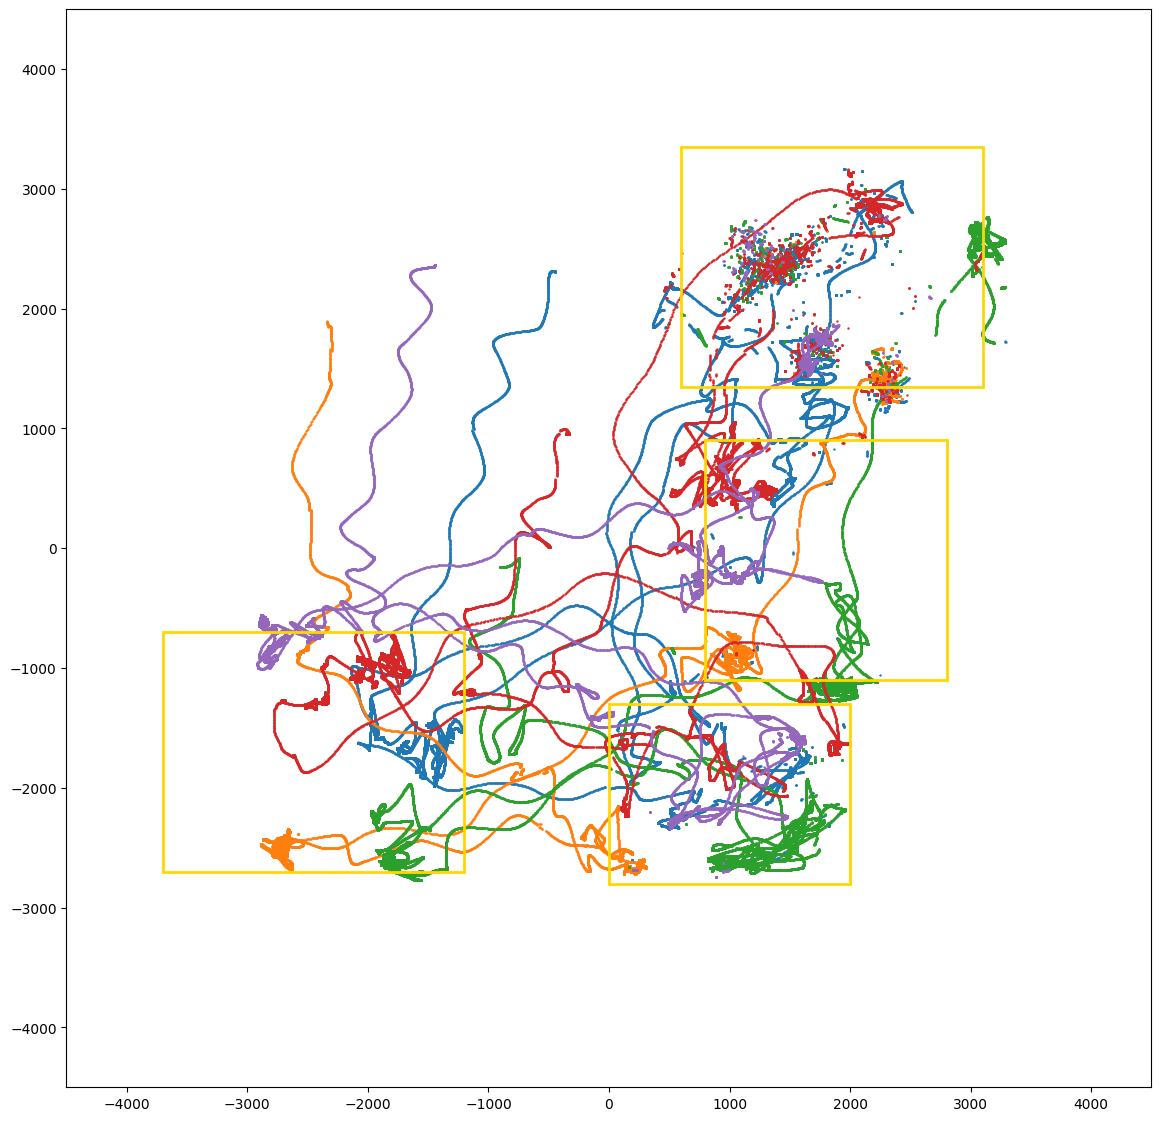

237822   -1320.150757
237823   -1319.952881
237824   -1319.769165
237825   -1319.582275
237826   -1319.413452
             ...     
304172            NaN
304173            NaN
304174            NaN
304175            NaN
304176            NaN
Name: 5TX, Length: 66355, dtype: float64


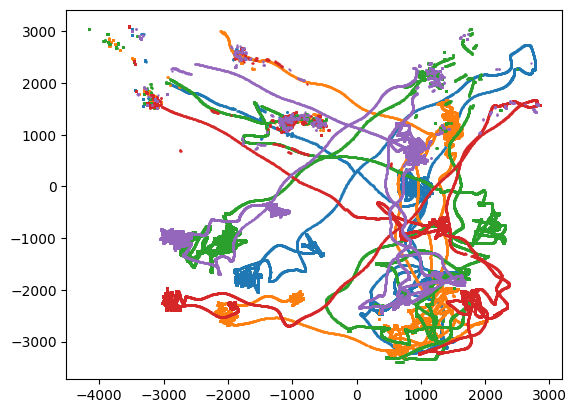

10000   -1445.514648
10001   -1445.390259
10002   -1445.977295
10003   -1446.026123
10004   -1445.925415
            ...     
48970    1282.454346
48971    1278.942993
48972    1275.679932
48973    1272.850464
48974    1269.163818
Name: 5TX, Length: 38975, dtype: float64


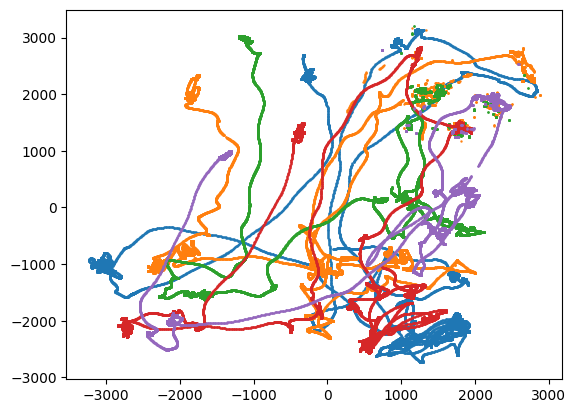

164773     410.397247
164774     411.878571
164775     413.324554
164776     414.709473
164777     416.060822
             ...     
227817    2604.039062
227818    2604.049805
227819    2604.036621
227820    2604.043701
227821    2604.054199
Name: 5TX, Length: 63049, dtype: float64


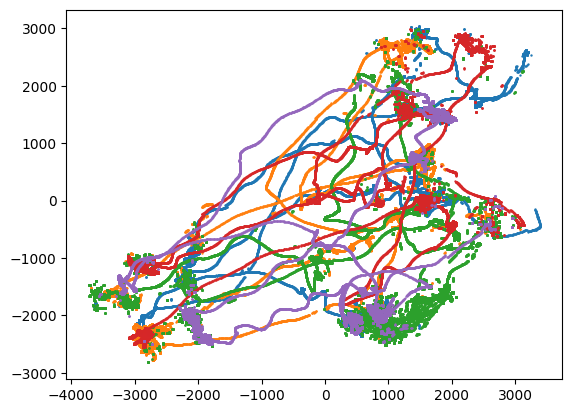

118289   -2343.827148
118290   -2343.745850
118291   -2343.613037
118292   -2343.480469
118293   -2343.310791
             ...     
154768     700.212280
154769     698.153992
154770     694.938049
154771    2513.056885
154772    2513.210693
Name: 5TX, Length: 36484, dtype: float64


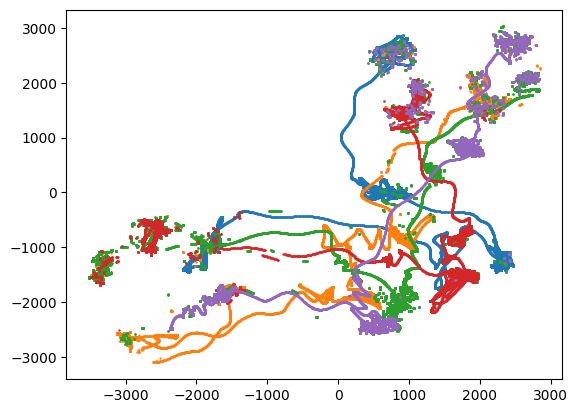

314177   -285.237427
314178   -285.258026
314179   -285.380920
314180   -285.289642
314181   -285.168915
             ...    
384290    663.993103
384291    663.992859
384292    663.987854
384293    663.994568
384294    663.986206
Name: 5TX, Length: 70118, dtype: float64


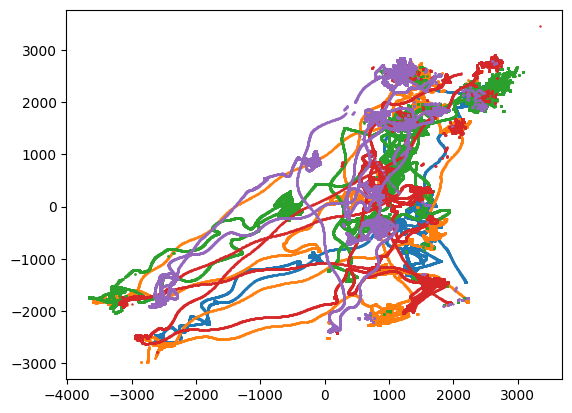

In [6]:
fig, ax = plt.subplots()

grouped = data_df.groupby('GROUP')

plt.xlim(-4500, 4500)
plt.ylim(-4500, 4500)

start = 10000
end = 100000

for name, group in grouped:
    x = group.iloc[start:end]['1TX']
    y = group.iloc[start:end]['1TY']
    plt.scatter(x, y, s=0.5)
    
    x = group.iloc[start:end]['2TX']
    y = group.iloc[start:end]['2TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['3TX']
    y = group.iloc[start:end]['3TY']
    plt.scatter(x, y, s=1)
    
    
    x = group.iloc[start:end]['4TX']
    y = group.iloc[start:end]['4TY']
    plt.scatter(x, y, s=0.5)
    
    
    x = group.iloc[start:end]['5TX']
    y = group.iloc[start:end]['5TY']
    plt.scatter(x, y, s=0.5)
    print(x)
    
    
    # Display the image
    # Create a Rectangle patch
    rect1 = patches.Rectangle((-3700, -2700), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect2 = patches.Rectangle((600, 1350), 2500, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect3 = patches.Rectangle((800, -1100), 2000, 2000, linewidth=2, edgecolor='gold', facecolor='none')
    rect4 = patches.Rectangle((0, -2800), 2000, 1500, linewidth=2, edgecolor='gold', facecolor='none')
    
    
    # Add the patch to the
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    ax.add_patch(rect4)
    
    width = 14
    height = 14
    fig.set_size_inches(width, height)
    
    plt.show()


### Plot with gaze direction

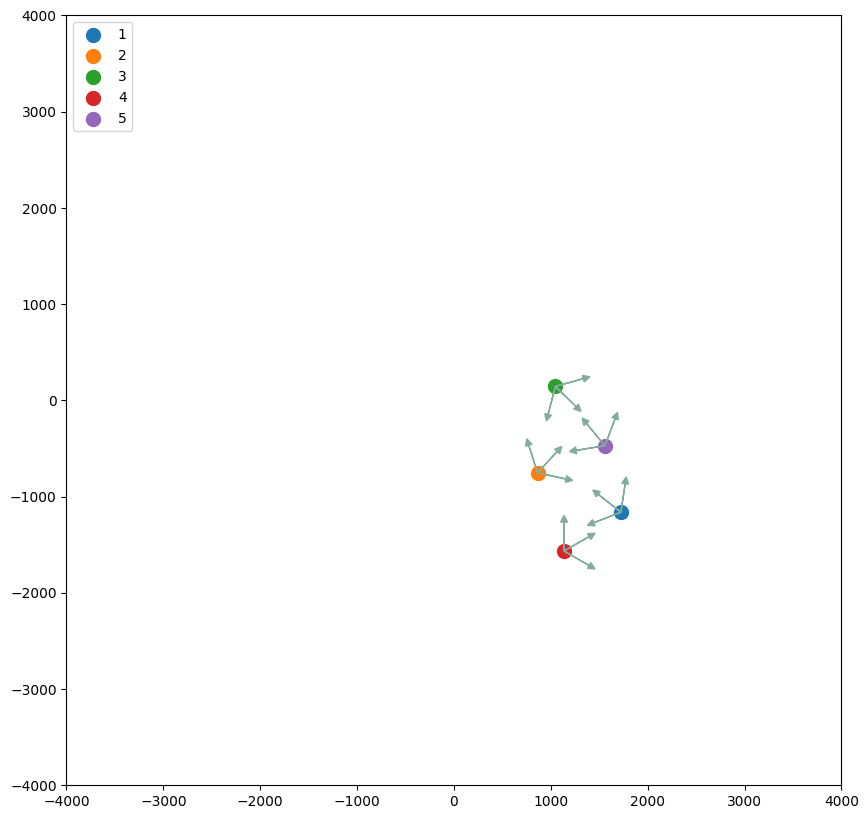

47080


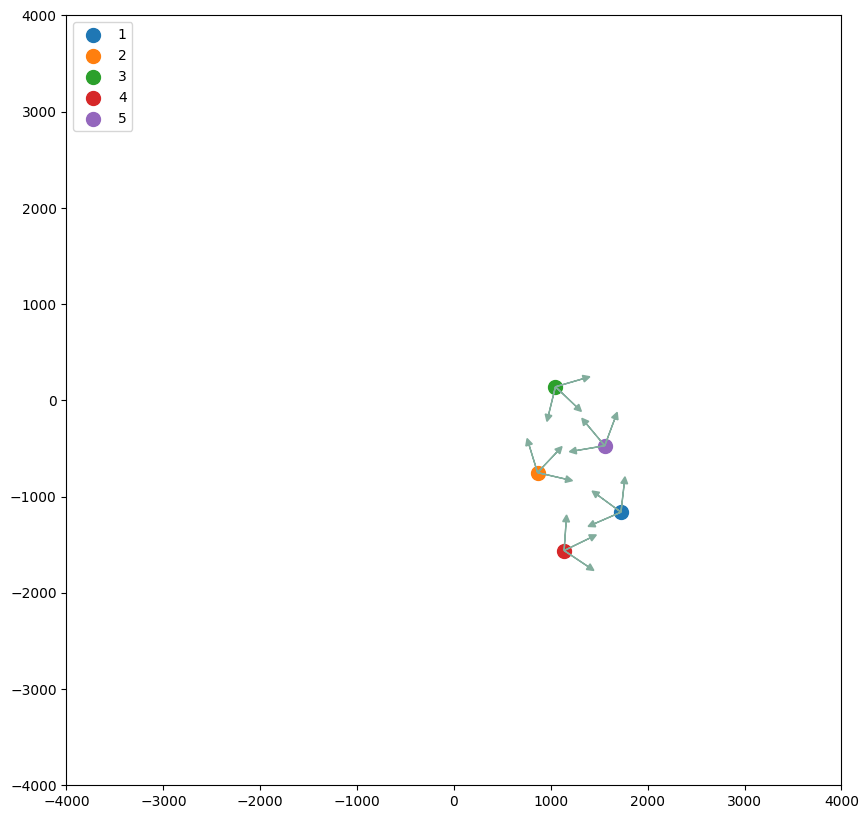

47085


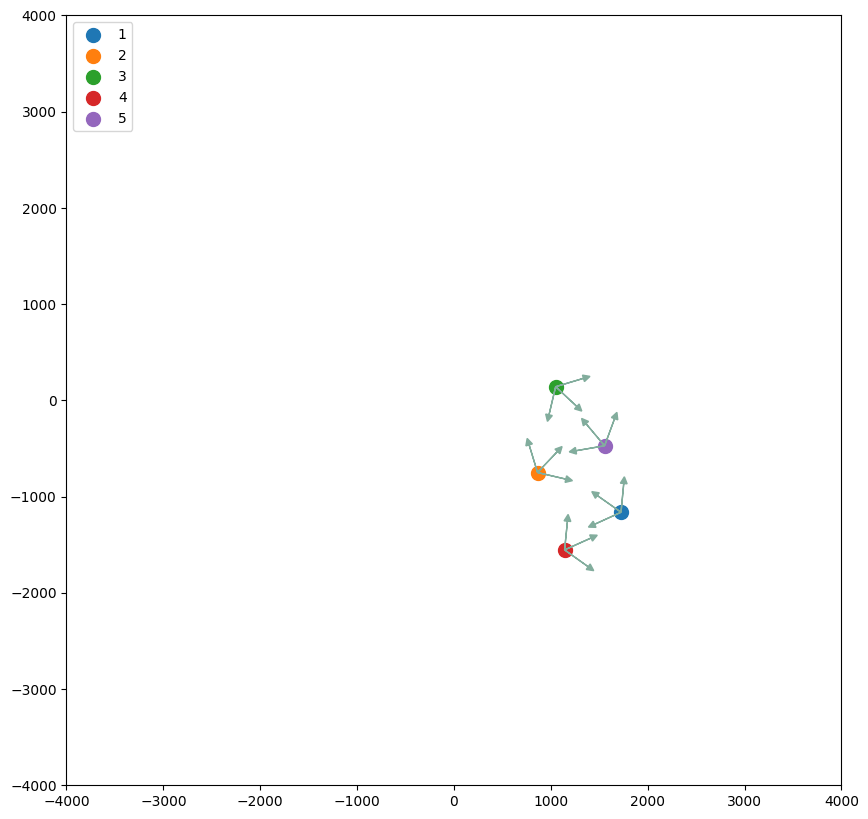

47090


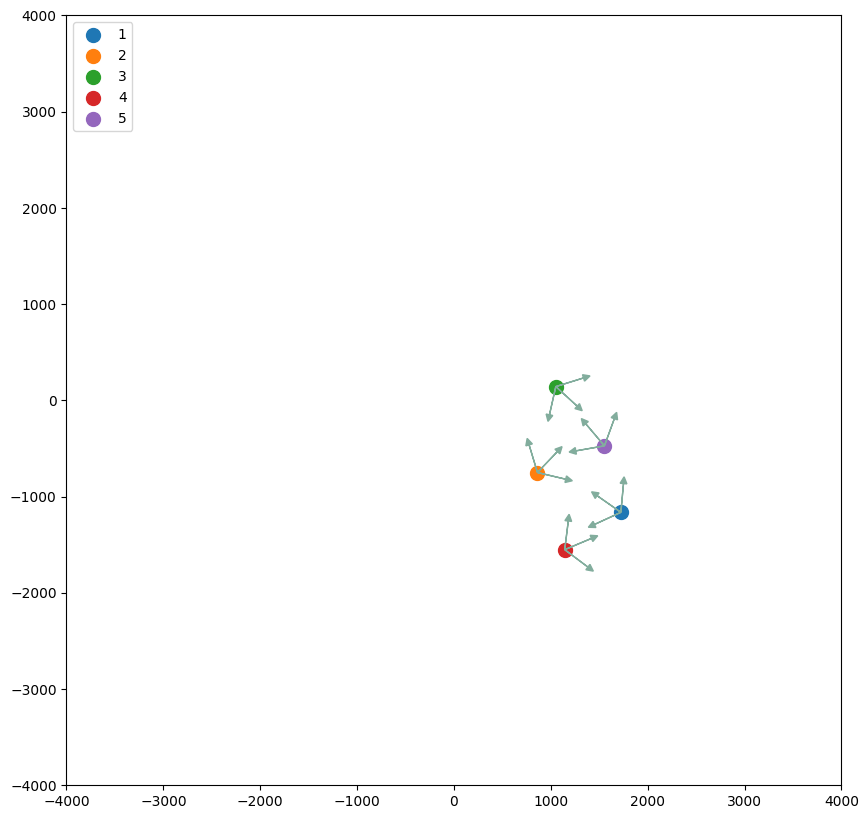

47095


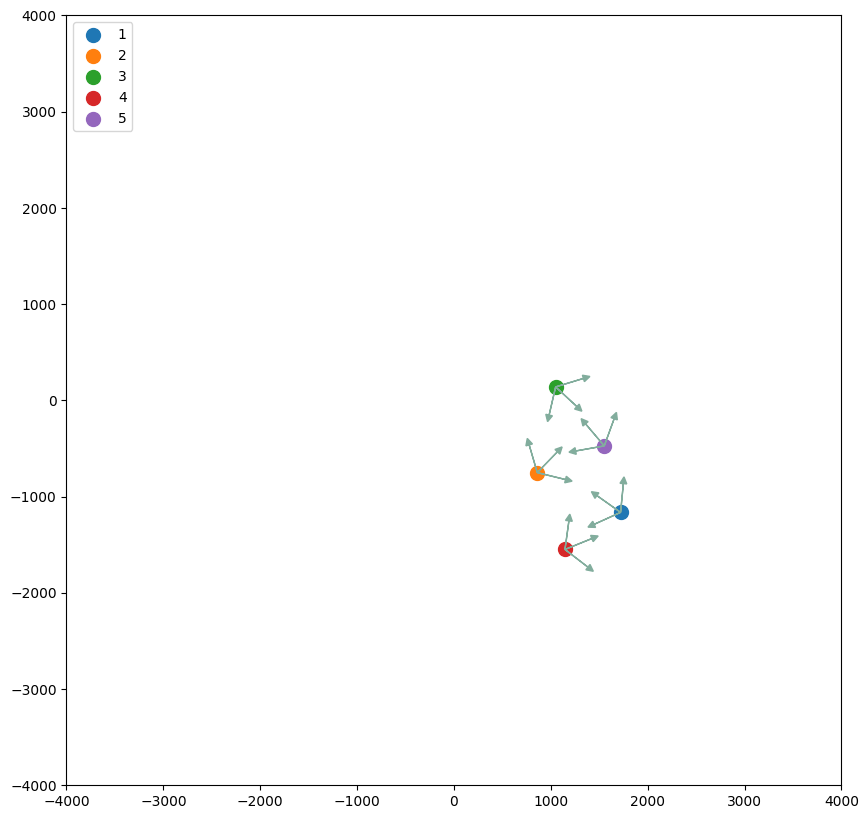

47100


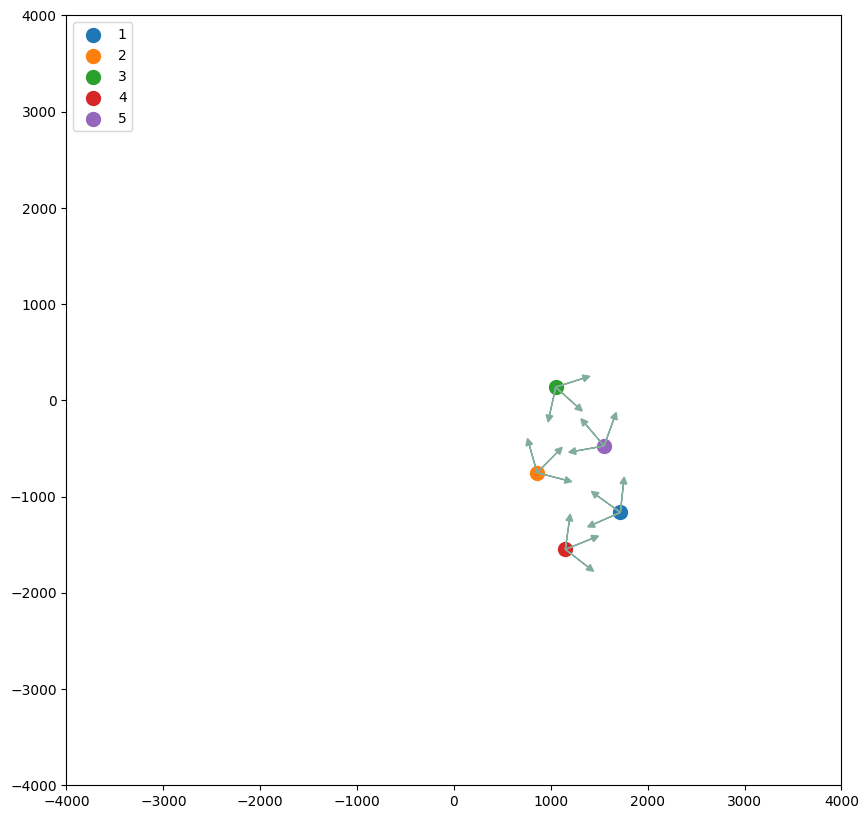

47105


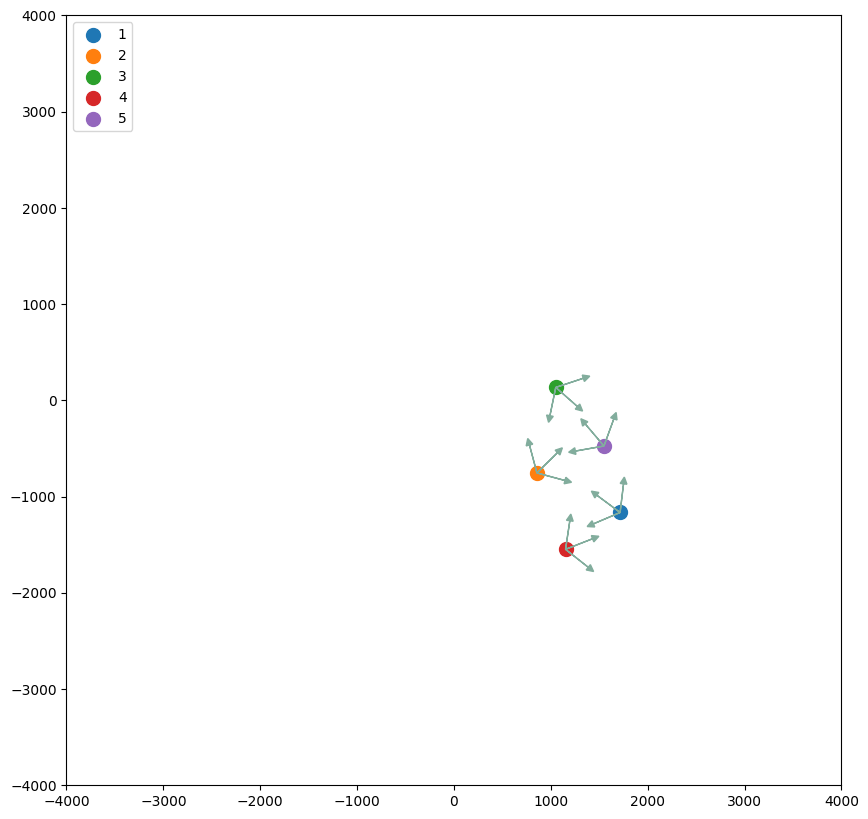

47110


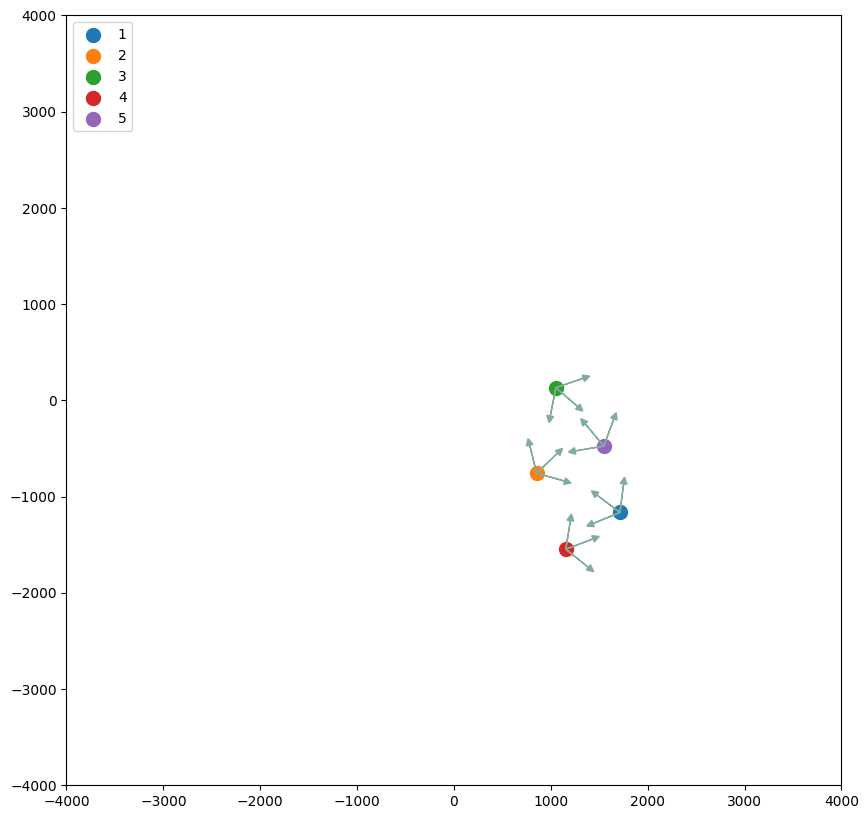

47115


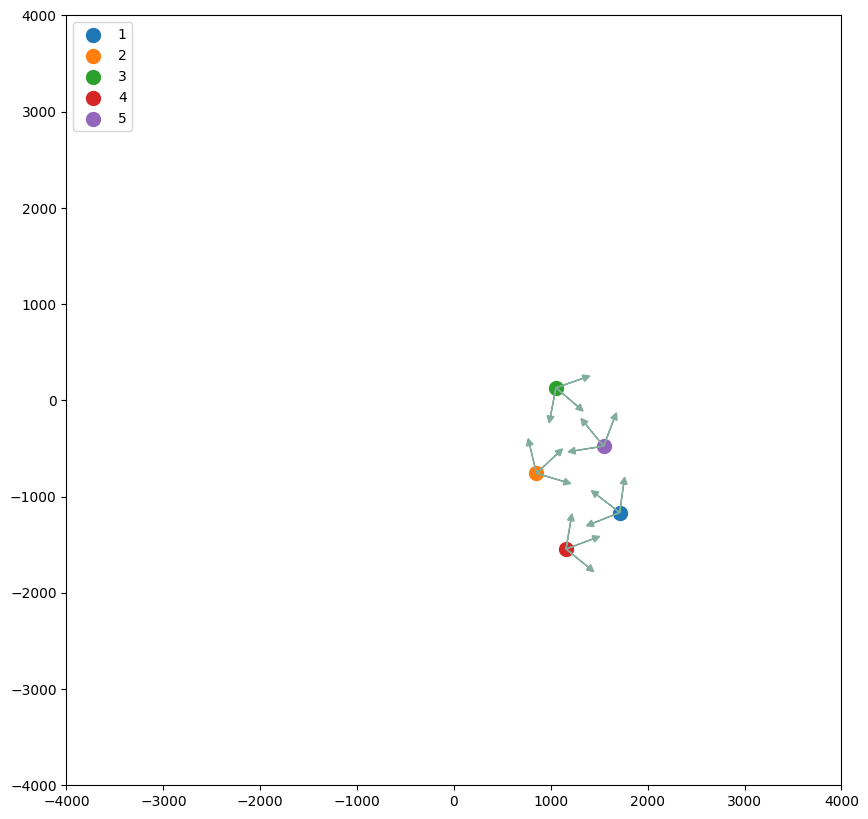

47120


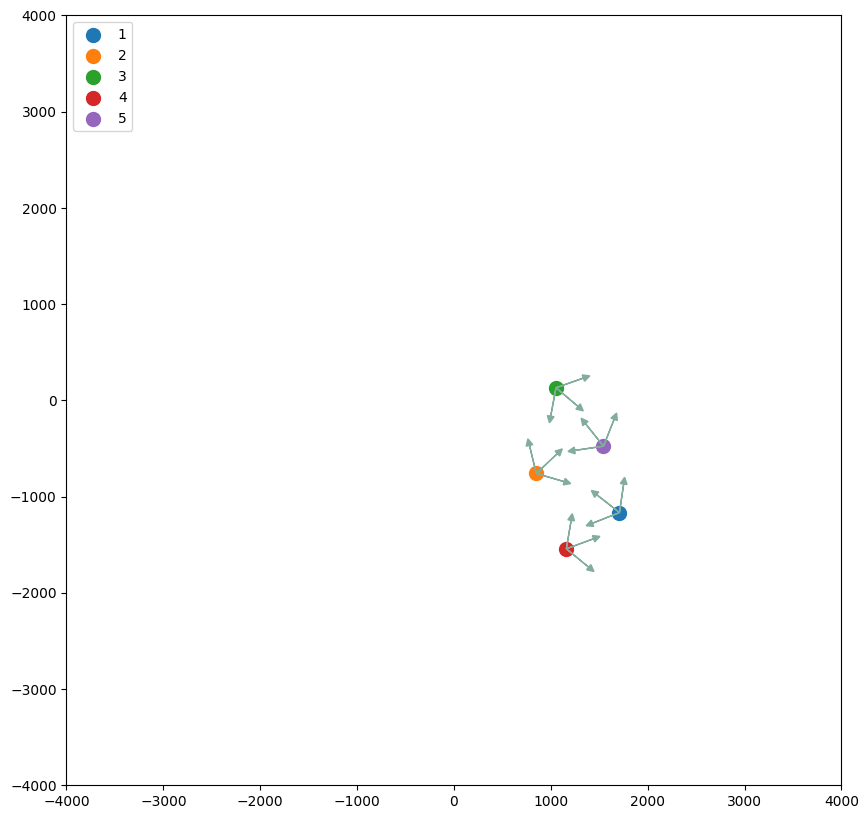

47125


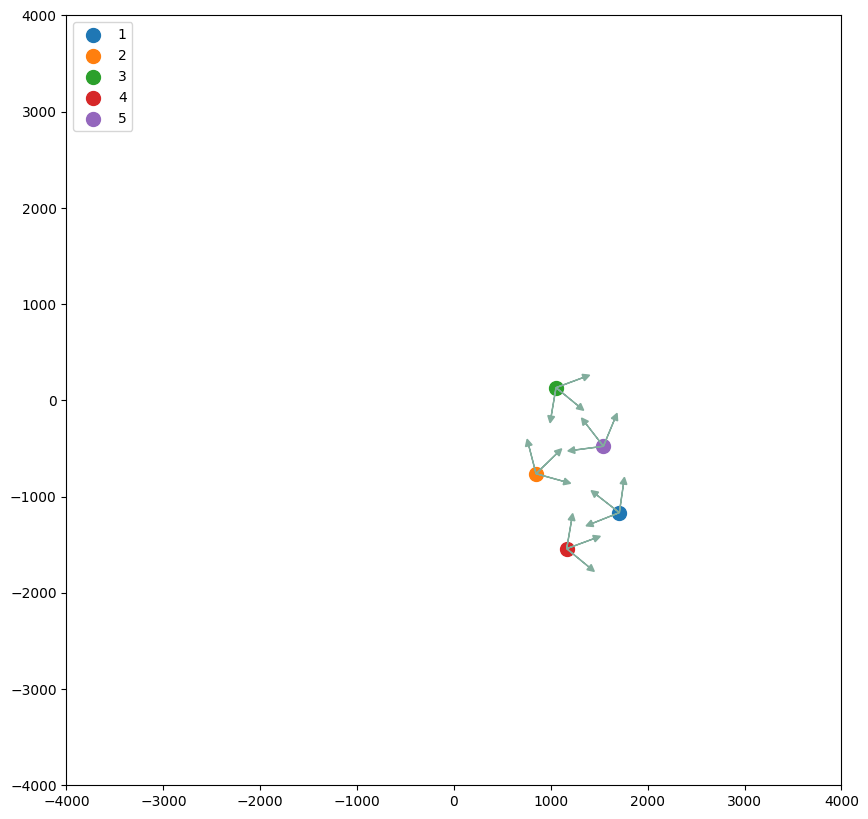

47130


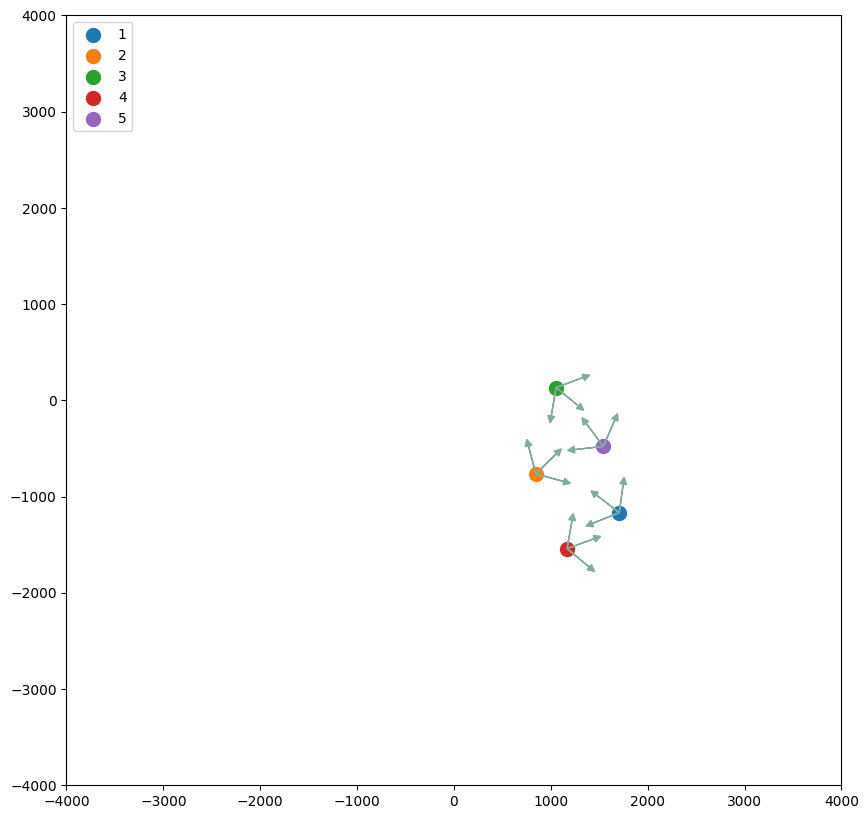

47135


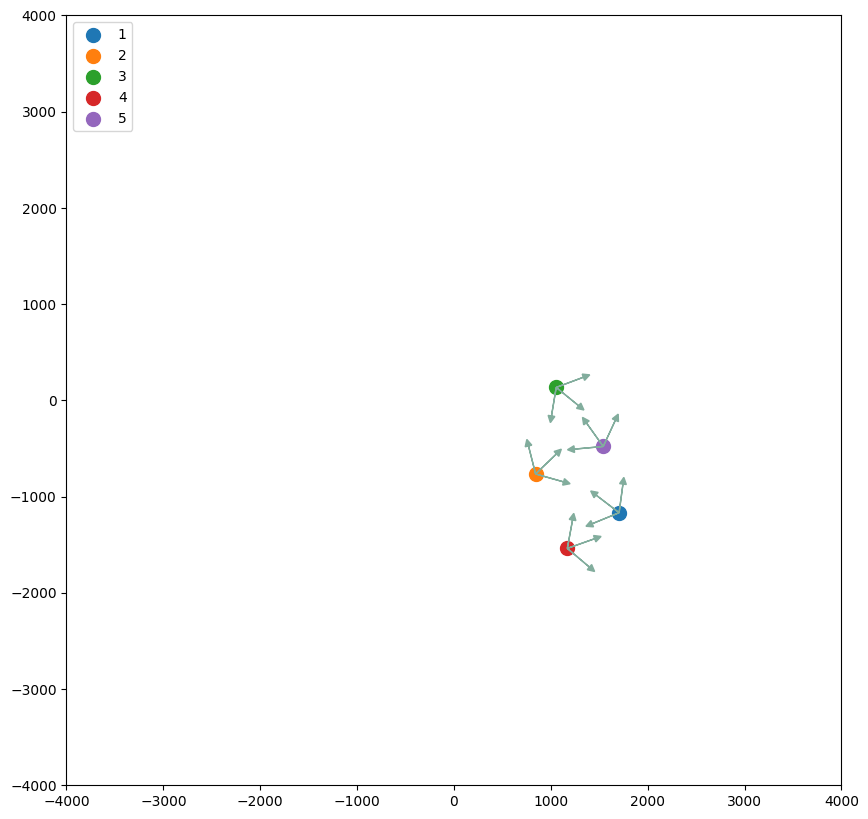

47140


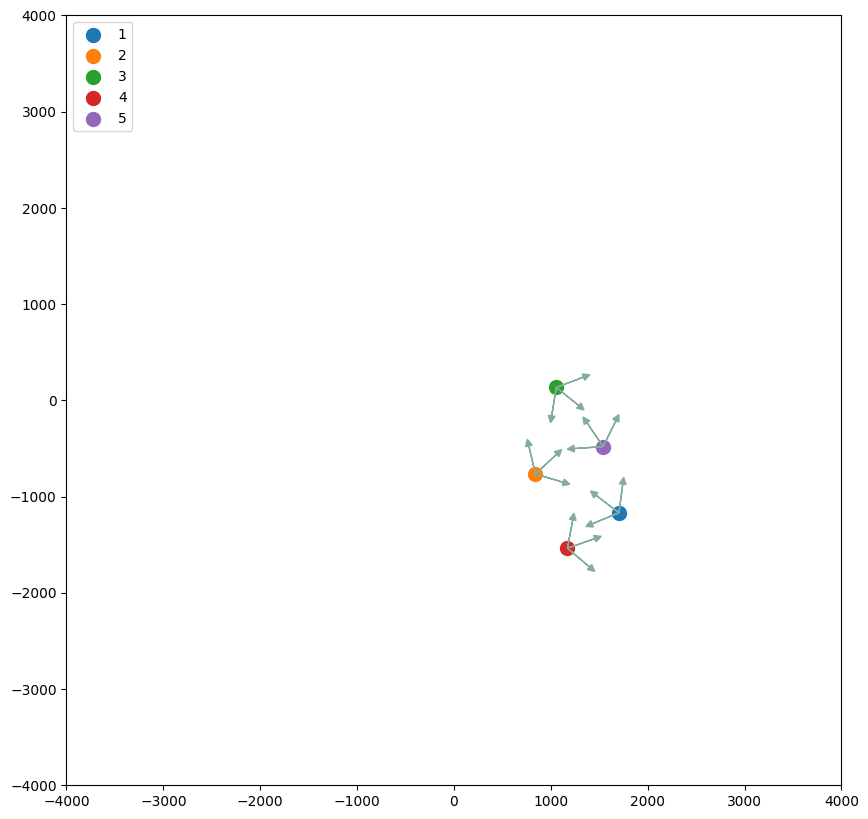

47145


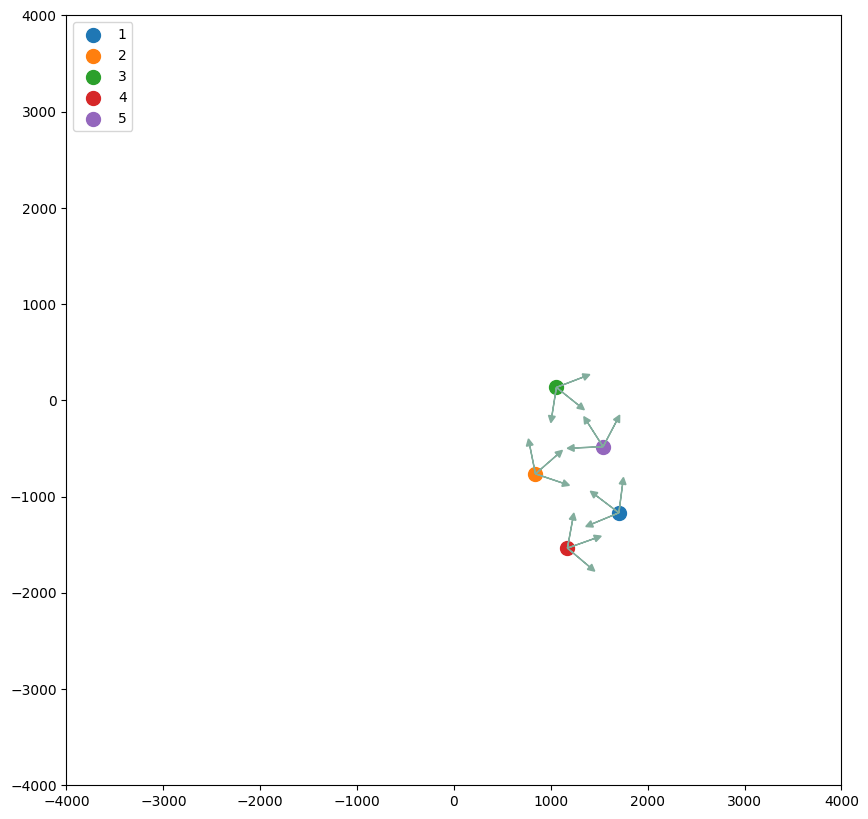

47150


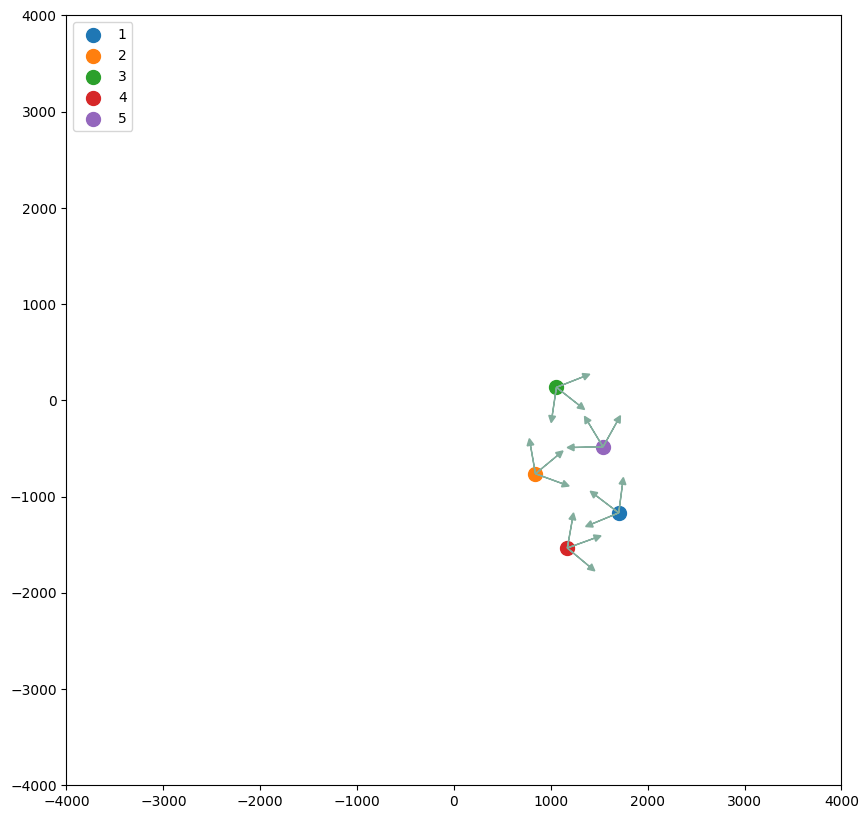

47155


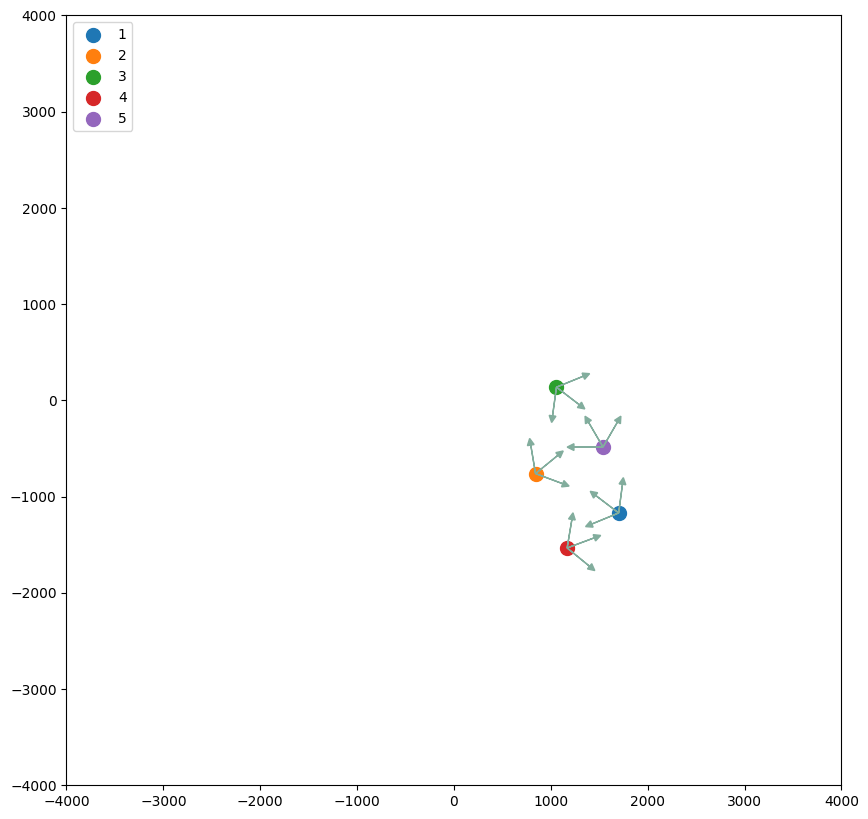

47160


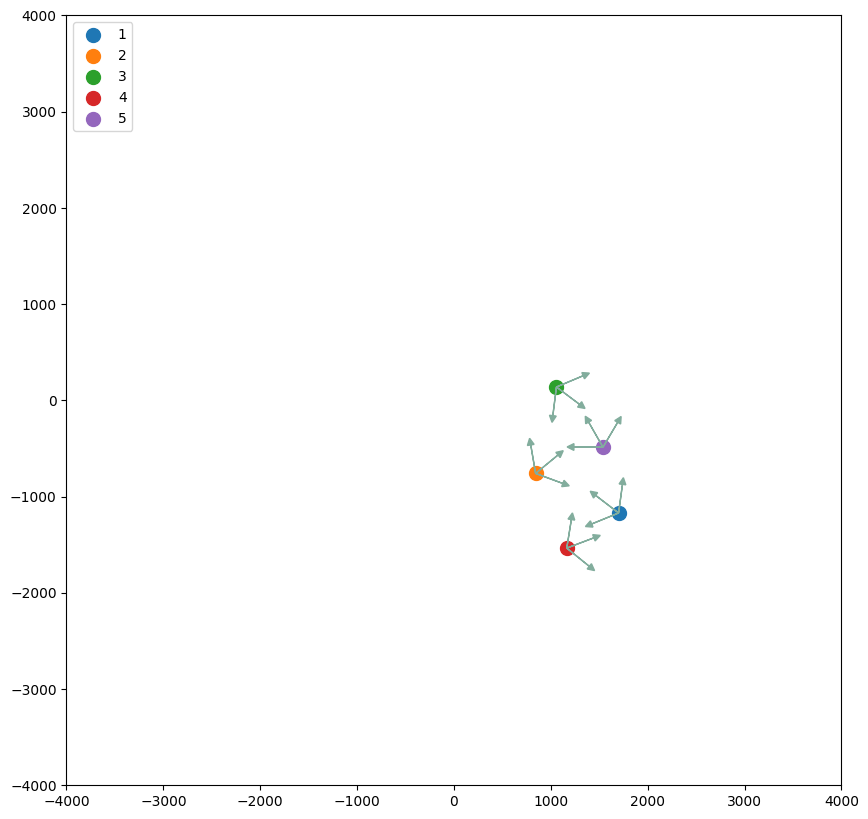

47165


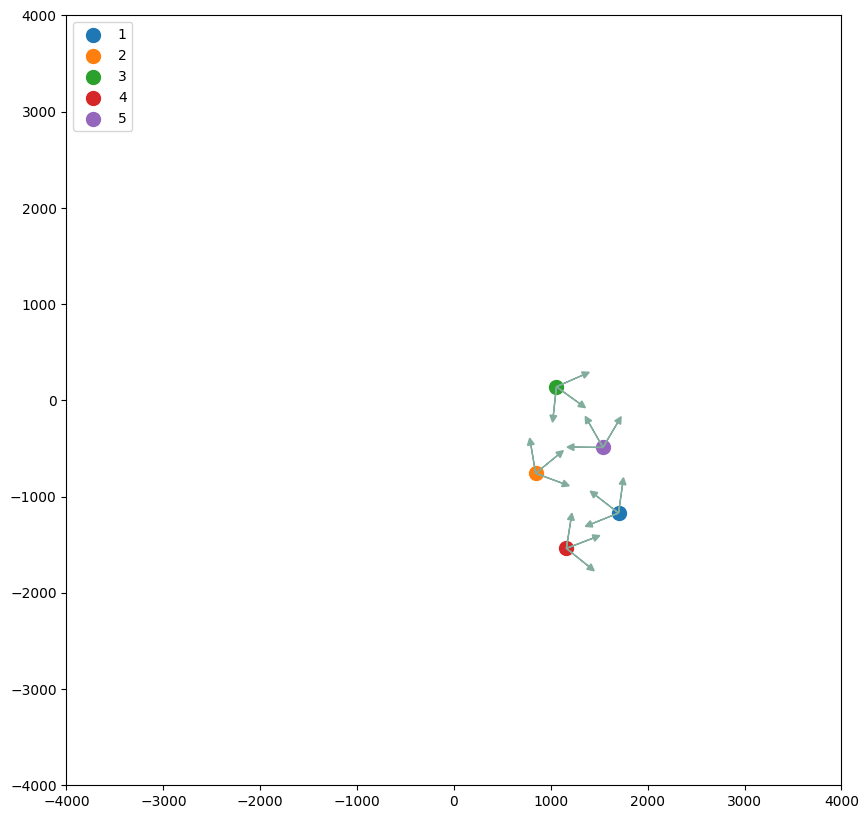

47170


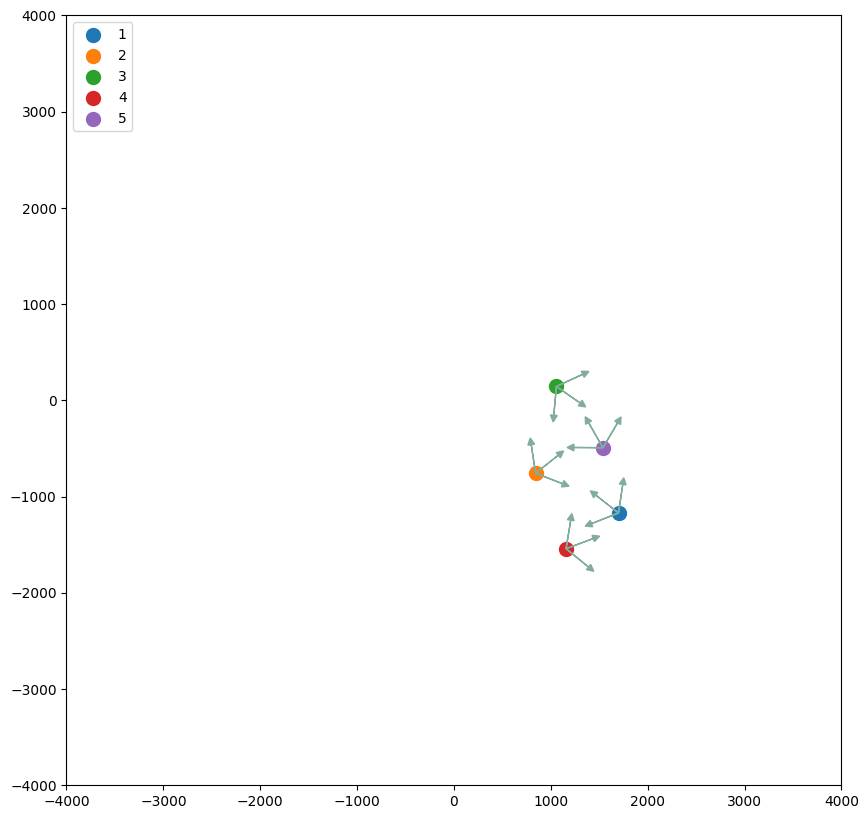

47175


In [7]:
fov_angle = math.radians(60)
start = 47080
end = 47180
length = 300

for index, row in data_df.iloc[start:end:5].iterrows():
    fig, ax = plt.subplots(figsize=(10, 10))

    for i in range(1, 6):
        label = str(i)
        x = row[f"{label}TX"]
        y = row[f"{label}TY"]
        yaw = row[f"{label}RZ"]

        plt.scatter(x, y, s=100, label=label)
        plt.arrow(
            x,
            y,
            length * np.cos(yaw),
            length * np.sin(yaw),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw - fov_angle),
            length * np.sin(yaw - fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )
        plt.arrow(
            x,
            y,
            length * np.cos(yaw + fov_angle),
            length * np.sin(yaw + fov_angle),
            head_width=70,
            head_length=70,
            color="#82ad9d",
            lw=1,
        )

    plt.xlim(-4000, 4000)
    plt.ylim(-4000, 4000)
    plt.legend(loc="upper left")
    plt.show()
    print(index)


### Transformations

In [8]:
def get_transform_world_2_player(array, agls):
    Tpw = t.compose_matrix(translate=[array[0], array[1], array[2]], angles=agls) #returns 4x4
    Twp = np.linalg.inv(Tpw)
    return(Twp)

def transform_participants(px, py, pz, p_rx, p_ry, p_rz, nx, ny, nz):
    Twp = get_transform_world_2_player([px, py, pz], [p_rx, p_ry, p_rz])
    return Twp.dot(np.array([float(nx),float(ny),float(nz),1.0]))


count = 1

#for group
# grp = data_df.groupby(by=["GROUP"])

# for group, data in grp:
#     data_dff = data_df.loc[data_df['GROUP'] == group]

for i in range(1,6):
    x = '%sTX'%i
    y = '%sTY'%i
    z = '%sTZ'%i
    p = '%sRX'%i
    r = '%sRY'%i
    yaw = '%sRZ'%i

    for j in range(1,6):
        x1 = '%sTX'%j
        y1 = '%sTY'%j
        z1 = '%sTZ'%j
        p1 = '%sRX'%j
        r1 = '%sRY'%j
        yaw1 = '%sRZ'%j
        if i == j:
            continue
        print(x, x1)
        data_df["%s%sx"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[0], axis=1)
        data_df["%s%sy"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[1], axis=1)
        data_df["%s%sz"%(i,j)] = data_df.apply(lambda row: transform_participants(row[x], row[y], row[z],row[p], row[r], row[yaw], row[x1], row[y1], row[z1])[2], axis=1)
        print("%s%sz"%(i,j))



1TX 2TX
12z
1TX 3TX
13z
1TX 4TX
14z
1TX 5TX
15z
2TX 1TX
21z
2TX 3TX
23z
2TX 4TX
24z
2TX 5TX
25z
3TX 1TX
31z
3TX 2TX
32z
3TX 4TX
34z
3TX 5TX
35z
4TX 1TX
41z
4TX 2TX
42z
4TX 3TX
43z
4TX 5TX
45z
5TX 1TX
51z
5TX 2TX
52z
5TX 3TX
53z
5TX 4TX
54z


In [9]:
data_df.columns

Index(['Frame', 'Sub Frame', '1RX', '1RY', '1RZ', '1TX', '1TY', '1TZ', '2RX',
       '2RY', '2RZ', '2TX', '2TY', '2TZ', '3RX', '3RY', '3RZ', '3TX', '3TY',
       '3TZ', '4RX', '4RY', '4RZ', '4TX', '4TY', '4TZ', '5RX', '5RY', '5RZ',
       '5TX', '5TY', '5TZ', 'GROUP', '12x', '12y', '12z', '13x', '13y', '13z',
       '14x', '14y', '14z', '15x', '15y', '15z', '21x', '21y', '21z', '23x',
       '23y', '23z', '24x', '24y', '24z', '25x', '25y', '25z', '31x', '31y',
       '31z', '32x', '32y', '32z', '34x', '34y', '34z', '35x', '35y', '35z',
       '41x', '41y', '41z', '42x', '42y', '42z', '43x', '43y', '43z', '45x',
       '45y', '45z', '51x', '51y', '51z', '52x', '52y', '52z', '53x', '53y',
       '53z', '54x', '54y', '54z'],
      dtype='object')

In [10]:
data_df = data_df.fillna(0)
data_df

Frame  Sub Frame       1RX       1RY        1RZ          1TX  \
0           1          0 -1.428056 -0.516452 -87.220340 -1556.672241   
1           2          0 -1.428784 -0.509176 -87.229850 -1555.468994   
2           3          0 -1.427032 -0.502205 -87.237812 -1554.560181   
3           4          0 -0.404298  0.122471 -90.783539  -244.748032   
4           5          0 -0.404625  0.123084 -90.782952  -244.493820   
...       ...        ...       ...       ...        ...          ...   
384290  80114          0 -0.150724  0.077843 -89.561956  2195.132812   
384291  80115          0 -0.150689  0.077989 -89.561920  2195.147949   
384292  80116          0 -0.150761  0.077891 -89.561895  2195.136475   
384293  80117          0 -0.150686  0.077894 -89.561987  2195.132812   
384294  80118          0 -0.150707  0.077887 -89.561948  2195.157959   

                1TY          1TZ       2RX       2RY  ...         51z  \
0       1027.392090  1789.757812  0.000000  0.000000  ...    0.000000   
1       1026.220703  1789.684937  0.000000  0.000000  ...    0.000000   
2       1024.966431  1789.598145  0.000000  0.000000  ...    0.000000   
3       1991.542969  1713.991455 -1.578893 -0.802824  ... -225.623823   
4       1991.572510  1713.996704 -1.588340 -0.816280  ... -218.507386   
...             ...          ...       ...       ...  ...         ...   
384290 -1438.786865  1068.234619  0.409880 -3.846665  ...  331.772945   
384291 -1438.802124  1068.252686  0.406747 -3.846874  ...  331.552617   
384292 -1438.787964  1068.242188  0.405425 -3.845295  ...  331.478191   
384293 -1438.788452  1068.236450  0.407506 -3.846482  ...  331.797196   
384294 -1438.820312  1068.266724  0.409008 -3.846727  ...  331.643120   

               52x          52y         52z         53x         53y  \
0         0.000000     0.000000    0.000000    0.000000    0.000000   
1         0.000000     0.000000    0.000000    0.000000    0.000000   
2         0.000000     0.000000    0.000000    0.000000    0.000000   
3      -668.353951   299.466488 -157.317164  916.103254  390.943128   
4      -671.802687   294.162783 -163.130045  911.811674  400.513243   
...            ...          ...         ...         ...         ...   
384290 -765.475974  1331.676824  297.657787 -919.165300  930.604704   
384291 -765.483200  1331.721711  297.468682 -919.183870  930.653050   
384292 -765.543642  1331.713383  297.422734 -919.227429  930.631971   
384293 -765.419549  1331.707220  297.721352 -919.151199  930.609163   
384294 -765.509089  1331.703685  297.553172 -919.216610  930.615030   

               53z         54x          54y         54z  
0         0.000000    0.000000     0.000000    0.000000  
1         0.000000    0.000000     0.000000    0.000000  
2         0.000000    0.000000     0.000000    0.000000  
3       -80.693335 -695.732365   264.220343 -184.444904  
4       -74.229150 -698.433341   257.998699 -191.015896  
...            ...         ...          ...         ...  
384290  304.549544 -640.767389  1125.888503  268.299400  
384291  304.346930 -640.771261  1125.920168  268.132394  
384292  304.299300 -640.814982  1125.903860  268.091294  
384293  304.553391 -640.721309  1125.899012  268.348713  
384294  304.420961 -640.806334  1125.875263  268.193033  

[384295 rows x 93 columns]

In [11]:
df_dist = df_dist.fillna(0)
df_dist

distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0           0.000000      0.188024      0.000000      0.000000      0.000000   
1           0.000000      0.187972      0.000000      0.000000      0.000000   
2           0.000000      0.187990      0.000000      0.000000      0.000000   
3           0.270465      0.180325      0.281025      0.434053      0.270465   
4           0.270449      0.180555      0.281040      0.434110      0.270449   
...              ...           ...           ...           ...           ...   
384290      0.050720      0.064382      0.069926      0.449102      0.050720   
384291      0.050716      0.064384      0.069925      0.449104      0.050716   
384292      0.050717      0.064382      0.069926      0.449103      0.050717   
384293      0.050721      0.064383      0.069926      0.449101      0.050721   
384294      0.050716      0.064384      0.069924      0.449106      0.050716   

        distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0           0.000000      0.000000      0.000000      0.188024      0.000000   
1           0.000000      0.000000      0.000000      0.187972      0.000000   
2           0.000000      0.000000      0.000000      0.187990      0.000000   
3           0.252455      0.005428      0.104478      0.180325      0.252455   
4           0.252601      0.005488      0.104812      0.180555      0.252601   
...              ...           ...           ...           ...           ...   
384290      0.068123      0.035554      0.225305      0.064382      0.068123   
384291      0.068123      0.035555      0.225306      0.064384      0.068123   
384292      0.068124      0.035557      0.225308      0.064382      0.068124   
384293      0.068129      0.035556      0.225307      0.064383      0.068129   
384294      0.068126      0.035558      0.225308      0.064384      0.068126   

        ...  distance_4_2  distance_4_3  distance_4_5  distance_5_1  \
0       ...      0.000000      0.000000      0.000000      0.000000   
1       ...      0.000000      0.000000      0.000000      0.000000   
2       ...      0.000000      0.000000      0.000000      0.000000   
3       ...      0.005428      0.262880      0.110794      0.434053   
4       ...      0.005488      0.263004      0.111075      0.434110   
...     ...           ...           ...           ...           ...   
384290  ...      0.035554      0.055650      0.198219      0.449102   
384291  ...      0.035555      0.055649      0.198218      0.449104   
384292  ...      0.035557      0.055650      0.198218      0.449103   
384293  ...      0.035556      0.055654      0.198218      0.449101   
384294  ...      0.035558      0.055649      0.198217      0.449106   

        distance_5_2  distance_5_3  distance_5_4   Frame   GROUP  Frame2  
0           0.000000      0.000000      0.000000       0  study3       1  
1           0.000000      0.000000      0.000000       1  study3       2  
2           0.000000      0.000000      0.000000       2  study3       3  
3           0.104478      0.180999      0.110794       3  study3       4  
4           0.104812      0.180883      0.111075       4  study3       5  
...              ...           ...           ...     ...     ...     ...  
384290      0.225305      0.241155      0.198219  384290  study6   80114  
384291      0.225306      0.241156      0.198218  384291  study6   80115  
384292      0.225308      0.241156      0.198218  384292  study6   80116  
384293      0.225307      0.241154      0.198218  384293  study6   80117  
384294      0.225308      0.241158      0.198217  384294  study6   80118  

[384295 rows x 23 columns]

### Angle/FOV

In [12]:
#fov
fov_angle = math.radians(60)
tan = math.tan(fov_angle)

fov_df = pd.DataFrame()  
soc_eng = pd.DataFrame() 

soc_eng["Frame"] = data_df['Frame']

#in FOV or not?
def fov_dist(df, id):    
    series = (1-abs(df['%sy'%id]/(tan*df['%sx'%id]))).clip(0)
    # if the other person is *behind*, set the 'fov_dist' to zero (not visible)
    series[df['%sx'%id] < 0] = 0
    
    return series


# grp = data_df.groupby(by=["GROUP"])

# # for group, data in grp:
#     data_dff = data_df.loc[data_df['GROUP'] == group]
#     df_dist_g = df_dist.loc[df_dist['GROUP'] == group]
fov_df["Frame"] = data_df['Frame']

    
for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_p_%s_%s"% (i,j)] = fov_dist(data_df, "%s%s" %(i,j))


for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        fov_df["fov_%s_%s"% (i,j)] = (fov_df["fov_p_%s_%s"% (i,j)] * fov_df["fov_p_%s_%s"% (i,j)])

        soc_eng["social_engagement_%s_%s"% (i,j)] = (fov_df["fov_%s_%s"% (i,j)] / df_dist["distance_%s_%s" %(i, j)]).clip(0,1)
        soc_eng['GROUP'] = data_df['GROUP']
        # soc_eng['GROUP'] = "4"


soc_eng = soc_eng.fillna(0)
soc_eng

Frame  social_engagement_1_2   GROUP  social_engagement_1_3  \
0           1                    0.0  study3               1.000000   
1           2                    0.0  study3               1.000000   
2           3                    0.0  study3               1.000000   
3           4                    1.0  study3               0.736929   
4           5                    1.0  study3               0.734761   
...       ...                    ...     ...                    ...   
384290  80114                    1.0  study6               0.000000   
384291  80115                    1.0  study6               0.000000   
384292  80116                    1.0  study6               0.000000   
384293  80117                    1.0  study6               0.000000   
384294  80118                    1.0  study6               0.000000   

        social_engagement_1_4  social_engagement_1_5  social_engagement_2_1  \
0                         0.0                    0.0               0.000000   
1                         0.0                    0.0               0.000000   
2                         0.0                    0.0               0.000000   
3                         1.0                    1.0               0.758228   
4                         1.0                    1.0               0.711767   
...                       ...                    ...                    ...   
384290                    1.0                    0.0               0.000000   
384291                    1.0                    0.0               0.000000   
384292                    1.0                    0.0               0.000000   
384293                    1.0                    0.0               0.000000   
384294                    1.0                    0.0               0.000000   

        social_engagement_2_3  social_engagement_2_4  social_engagement_2_5  \
0                         0.0                    0.0                    0.0   
1                         0.0                    0.0                    0.0   
2                         0.0                    0.0                    0.0   
3                         1.0                    0.0                    1.0   
4                         1.0                    0.0                    1.0   
...                       ...                    ...                    ...   
384290                    0.0                    0.0                    0.0   
384291                    0.0                    0.0                    0.0   
384292                    0.0                    0.0                    0.0   
384293                    0.0                    0.0                    0.0   
384294                    0.0                    0.0                    0.0   

        ...  social_engagement_3_4  social_engagement_3_5  \
0       ...                    0.0                    0.0   
1       ...                    0.0                    0.0   
2       ...                    0.0                    0.0   
3       ...                    1.0                    1.0   
4       ...                    1.0                    1.0   
...     ...                    ...                    ...   
384290  ...                    0.0                    0.0   
384291  ...                    0.0                    0.0   
384292  ...                    0.0                    0.0   
384293  ...                    0.0                    0.0   
384294  ...                    0.0                    0.0   

        social_engagement_4_1  social_engagement_4_2  social_engagement_4_3  \
0                    0.000000                    0.0                    0.0   
1                    0.000000                    0.0                    0.0   
2                    0.000000                    0.0                    0.0   
3                    1.000000                    1.0                    1.0   
4                    1.000000                    1.0                    1.0   
...                       ...                    .

In [13]:
soc_eng.describe()

Frame  social_engagement_1_2  social_engagement_1_3  \
count  384295.000000          384295.000000          384295.000000   
mean    33389.692973               0.401210               0.425197   
std     20627.230567               0.471542               0.474427   
min         1.000000               0.000000               0.000000   
25%     16013.000000               0.000000               0.000000   
50%     32025.000000               0.000000               0.000774   
75%     48348.000000               1.000000               1.000000   
max     80118.000000               1.000000               1.000000   

       social_engagement_1_4  social_engagement_1_5  social_engagement_2_1  \
count          384295.000000          384295.000000          384295.000000   
mean                0.359776               0.309819               0.322464   
std                 0.460699               0.430800               0.450864   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 1.000000               0.879272               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_2_3  social_engagement_2_4  social_engagement_2_5  \
count          384295.000000          384295.000000          384295.000000   
mean                0.285817               0.281296               0.351521   
std                 0.435607               0.433602               0.460612   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.984737               0.898928               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_3_1  ...  social_engagement_3_4  \
count          384295.000000  ...          384295.000000   
mean                0.386930  ...               0.423378   
std                 0.470562  ...               0.474007   
min                 0.000000  ...               0.000000   
25%                 0.000000  ...               0.000000   
50%                 0.000000  ...               0.004895   
75%                 1.000000  ...               1.000000   
max                 1.000000  ...               1.000000   

       social_engagement_3_5  social_engagement_4_1  social_engagement_4_2  \
count          384295.000000          384295.000000          384295.000000   
mean                0.406491               0.368876               0.458739   
std                 0.463157               0.462506               0.477937   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.151535   
75%                 1.000000               1.000000               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_4_3  social_engagement_4_5  social_engagement_5_1  \
count          384295.000000          384295.000000          384295.000000   
mean                0.413946               0.328056               0.356137   
std                 0.473430               0.455417               0.451320   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 1.000000               1.000000               1.000000   
max                 1.000000               1.000000               1.000000   

       social_engagement_5_2  s

### Social Engagement Metric 

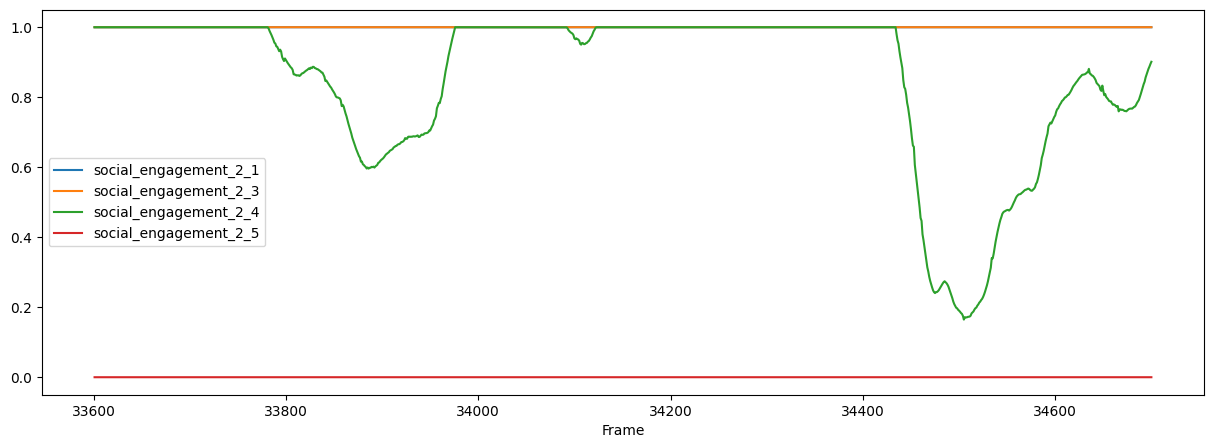

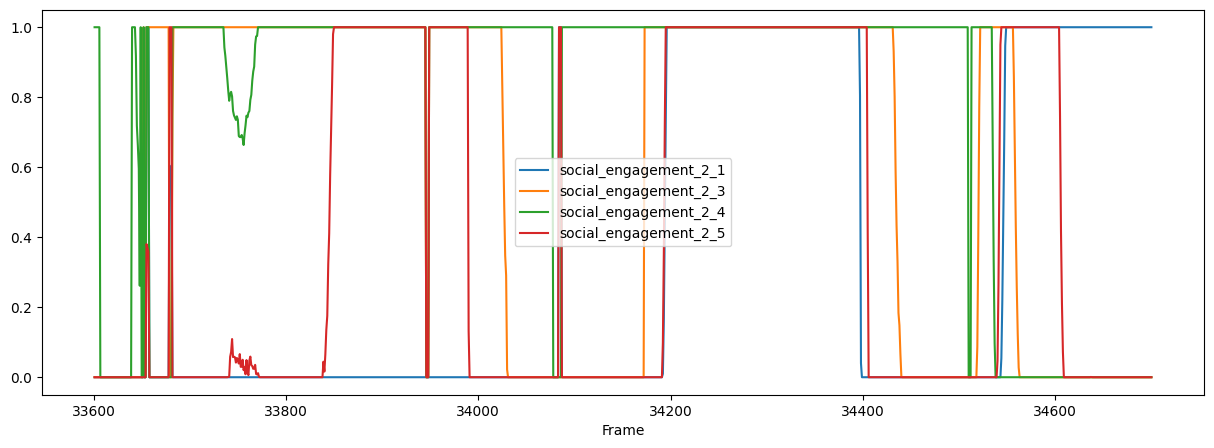

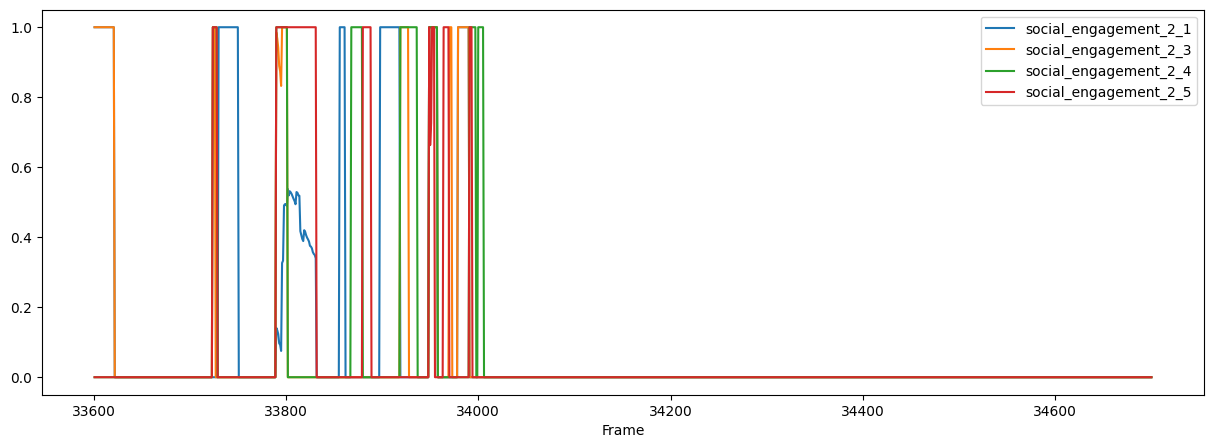

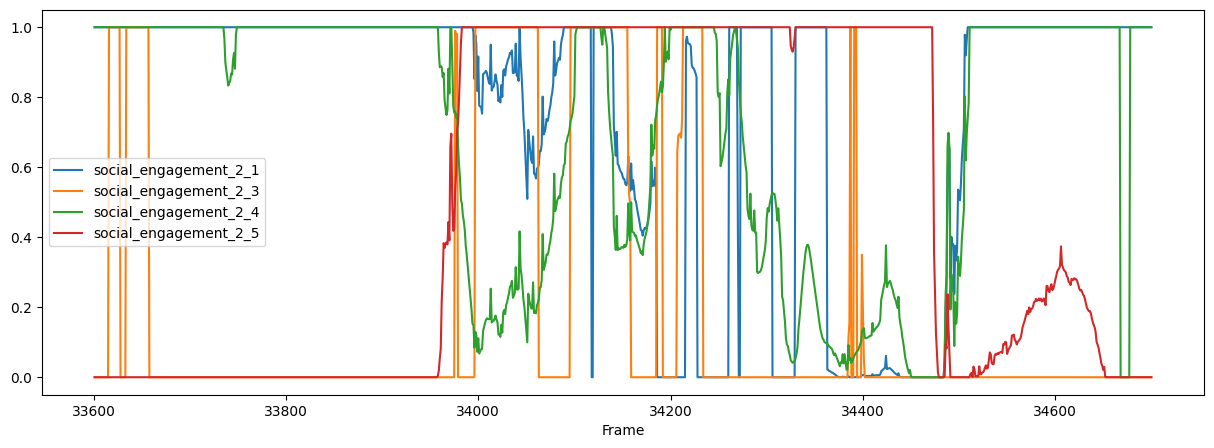

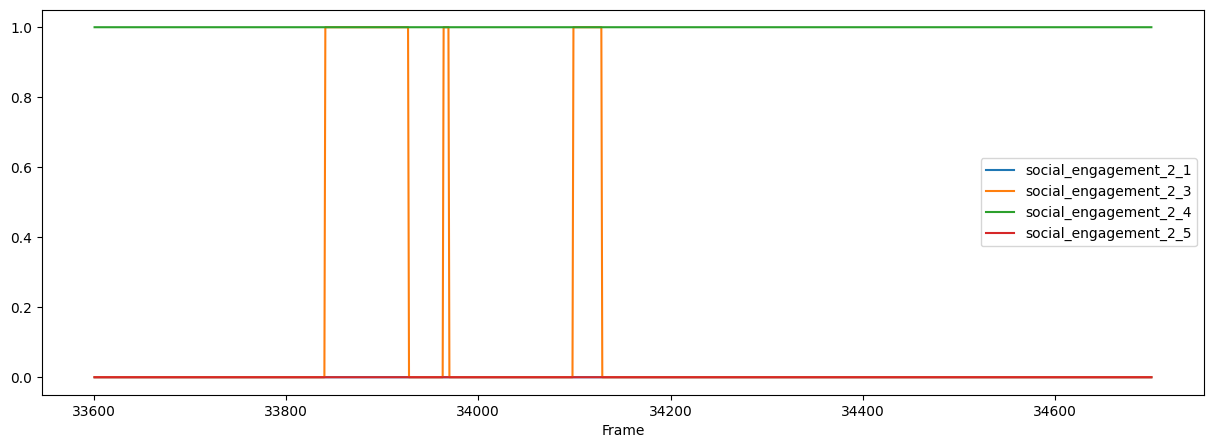

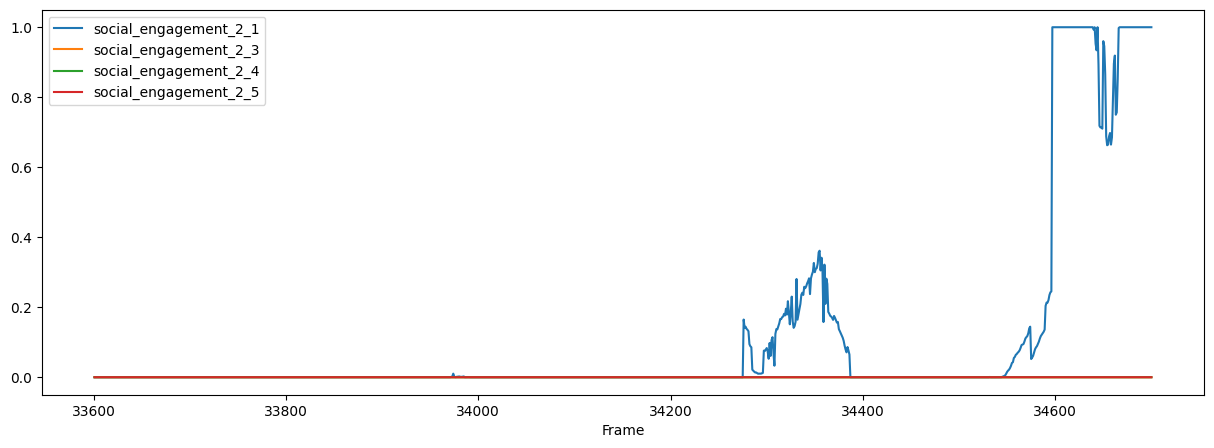

In [14]:
grouped = soc_eng.groupby('GROUP')

for name, group in grouped:
#     group.iloc[7000:60000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))
    group.iloc[33600:34700][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))


# soc_eng.iloc[1000:10000][["Frame", "social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].plot(x="Frame", kind="line", figsize=(15,5))    

In [15]:
eng_df = pd.DataFrame()  

eng_df['soc_average_1'] = soc_eng[["social_engagement_1_2", "social_engagement_1_3", "social_engagement_1_4", "social_engagement_1_5"]].max(axis=1)
eng_df['soc_average_2'] = soc_eng[["social_engagement_2_1", "social_engagement_2_3", "social_engagement_2_4", "social_engagement_2_5"]].max(axis=1, numeric_only=True)
eng_df['soc_average_3'] = soc_eng[["social_engagement_3_1", "social_engagement_3_2", "social_engagement_3_4", "social_engagement_3_5"]].max(axis=1)
eng_df['soc_average_4'] = soc_eng[["social_engagement_4_1", "social_engagement_4_2", "social_engagement_4_3", "social_engagement_4_5"]].max(axis=1)
eng_df['soc_average_5'] = soc_eng[["social_engagement_5_1", "social_engagement_5_2", "social_engagement_5_3", "social_engagement_5_4"]].max(axis=1)
eng_df['GROUP'] = soc_eng["GROUP"]
eng_df = eng_df.reset_index() 
# eng_df = eng_df.drop('index', axis=1)

eng_df = eng_df.fillna(0)
eng_df
# print(soc_eng.describe())
# print(eng_df.describe())

index  soc_average_1  soc_average_2  soc_average_3  soc_average_4  \
0            0            1.0            0.0            1.0            0.0   
1            1            1.0            0.0            1.0            0.0   
2            2            1.0            0.0            1.0            0.0   
3            3            1.0            1.0            1.0            1.0   
4            4            1.0            1.0            1.0            1.0   
...        ...            ...            ...            ...            ...   
384290  384290            1.0            0.0            0.0            1.0   
384291  384291            1.0            0.0            0.0            1.0   
384292  384292            1.0            0.0            0.0            1.0   
384293  384293            1.0            0.0            0.0            1.0   
384294  384294            1.0            0.0            0.0            1.0   

        soc_average_5   GROUP  
0                 0.0  study3  
1                 0.0  study3  
2                 0.0  study3  
3                 1.0  study3  
4                 1.0  study3  
...               ...     ...  
384290            0.0  study6  
384291            0.0  study6  
384292            0.0  study6  
384293            0.0  study6  
384294            0.0  study6  

[384295 rows x 7 columns]

In [16]:
###smoothing, rolling window average
# eng_df = eng_df.rolling(window=30).mean() 

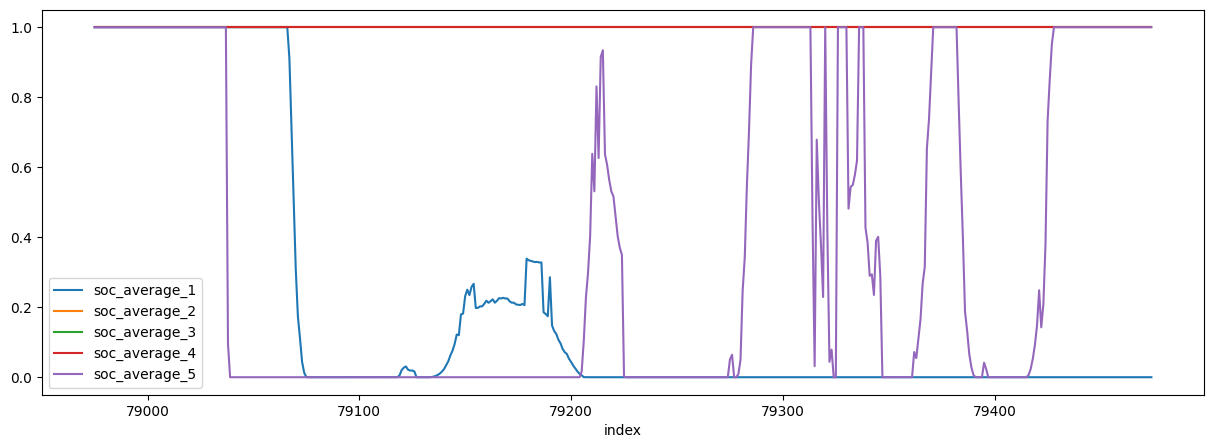

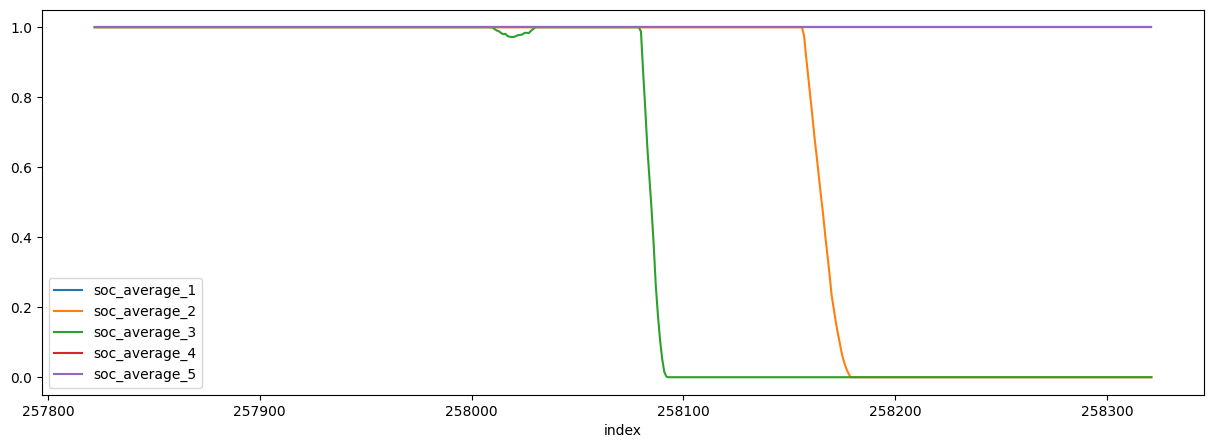

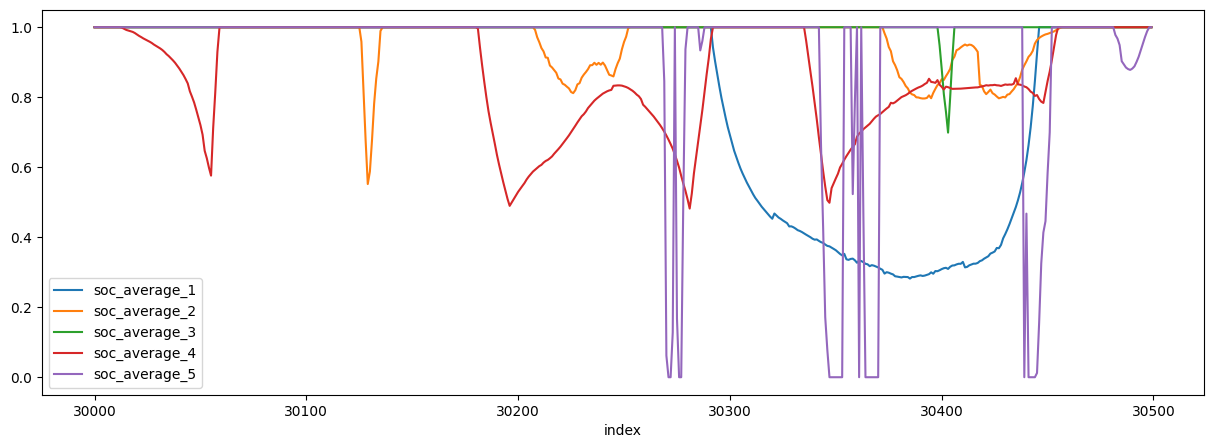

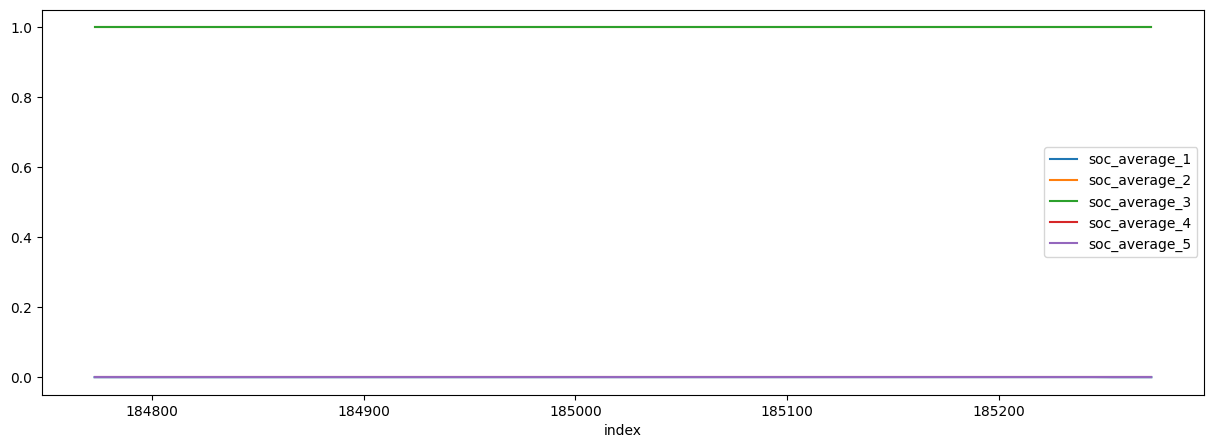

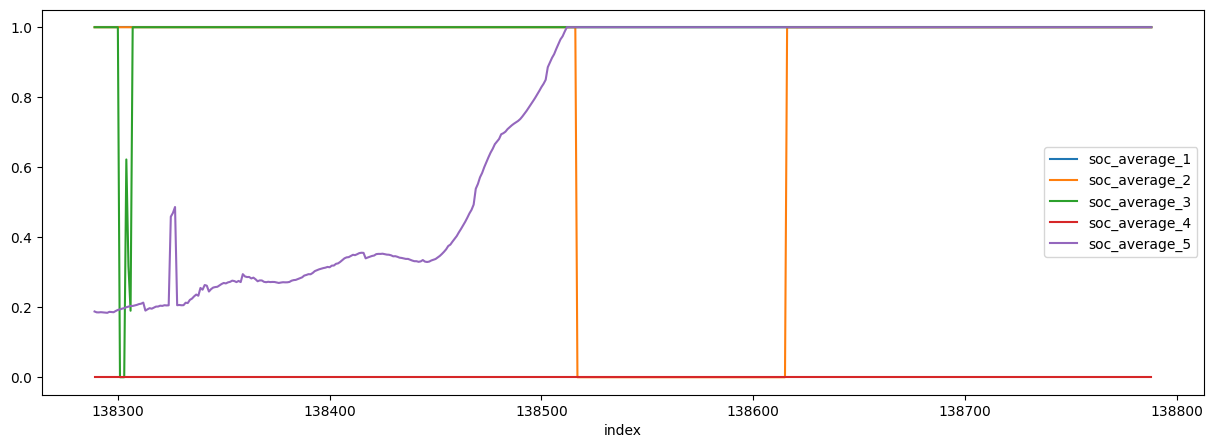

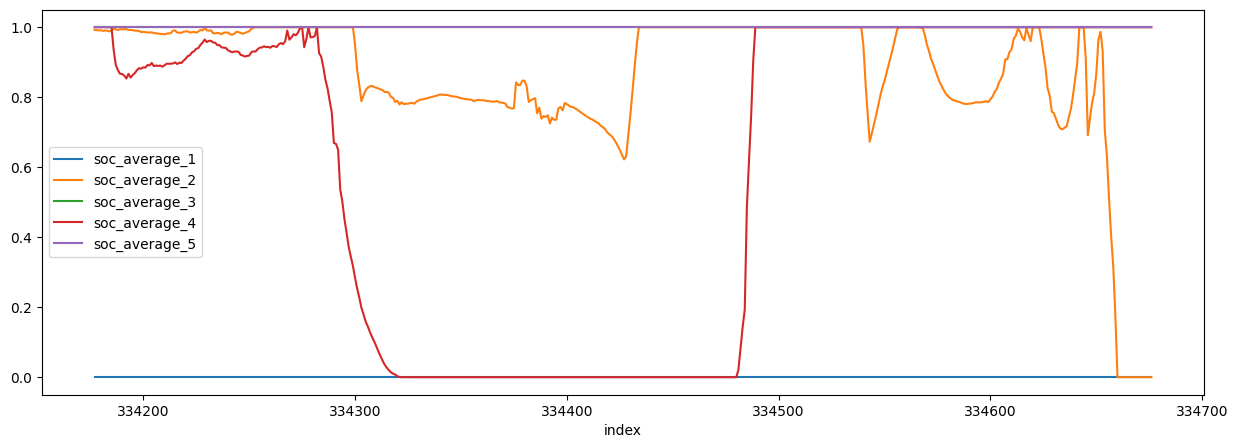

In [17]:
grouped = eng_df.groupby('GROUP')

for name, group in grouped:
    group.iloc[30000:30500][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))
    
    
# eng_df.iloc[40000:40200][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

# eng_df.iloc[31550:33000][["index", "soc_average_1", "soc_average_2", "soc_average_3", "soc_average_4", "soc_average_5"]].plot(x="index", kind="line", figsize=(15,5))    

## Create Video

In [18]:
# #! python3

# import pandas as pd
# import matplotlib.pyplot as plt
# from pathlib import Path
# import numpy as np
# import math
# import numpy as np
# import matplotlib.animation as animation

# VICON_FPS = 100
# VIDEO_FPS = 20

# start = 601 * VIDEO_FPS
# end =  800 * VIDEO_FPS  # 10sec video

# #####################################################

# csv_files = Path(".").glob("study6H.csv")
# data_df = pd.concat([pd.read_csv(fp) for fp in csv_files])


# # convert df index to time periods
# data_df.set_index(
#     pd.date_range(0, periods=len(data_df), freq="%fS" % (1 / VICON_FPS)), inplace=True
# )

# # resample df to target FPS
# data_df = data_df.resample("%fS" % (1 / VIDEO_FPS)).mean()


# data_df['1RZ'] = data_df['1RZ'] - 90
# # data_df['2RZ'] = data_df['2RZ'] - 90
# data_df['3RZ'] = data_df['3RZ'] + 90
# data_df['4RZ'] = data_df['4RZ'] - 90
# data_df['5RZ'] = data_df['5RZ'] - 90



# fov_angle = math.radians(60)

# length = 500

# fig, ax = plt.subplots(figsize=(10, 10))


# def init():
#     plt.legend(loc="upper left")

#     plt.xlim(-5000, 5000)
#     plt.ylim(-5000, 5000)


# def update(frame):

#     print("Done %s%%" % (100 * (frame - start) / (end - start)))

#     row = data_df.iloc[frame]

#     x = row["1TX"]
#     y = row["1TY"]
#     yaw = row["1RZ"]

#     fig.clear()

#     plt.xlim(-5000, 5000)
#     plt.ylim(-5000, 5000)

#     plt.scatter(x, y, s=100, label="1")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw - fov_angle),
#         length * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw + fov_angle),
#         length * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     x = row["2TX"]
#     y = row["2TY"]
#     yaw = row["2RZ"]
#     plt.scatter(x, y, s=100, label="2")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw - fov_angle),
#         length * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw + fov_angle),
#         length * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     x = row["3TX"]
#     y = row["3TY"]
#     yaw = row["3RZ"]
#     plt.scatter(x, y, s=100, label="3")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw - fov_angle),
#         length * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw + fov_angle),
#         length * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     x = row["4TX"]
#     y = row["4TY"]
#     yaw = row["4RZ"]
#     plt.scatter(x, y, s=100, label="4")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw - fov_angle),
#         length * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw + fov_angle),
#         length * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     x = row["5TX"]
#     y = row["5TY"]
#     yaw = row["5RZ"]
#     plt.scatter(x, y, s=100, label="5")
#     plt.arrow(
#         x,
#         y,
#         length * np.cos(yaw),
#         length * np.sin(yaw),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         600 * np.cos(yaw - fov_angle),
#         600 * np.sin(yaw - fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )
#     plt.arrow(
#         x,
#         y,
#         600 * np.cos(yaw + fov_angle),
#         600 * np.sin(yaw + fov_angle),
#         head_width=100,
#         head_length=100,
#         color="#82ad9d",
#         lw=1,
#     )

#     plt.legend(loc="upper left")
#     plt.title(frame)
    
# ani = animation.FuncAnimation(fig, update, frames=range(start, end), init_func=init)
# writergif = animation.PillowWriter(fps=20)
# ani.save('study6_4.gif',writer=writergif)


# # ani.save("test.mp4", fps=VIDEO_FPS)


## Using human verified interaction starting points

In [19]:
from pathlib import Path


def load_and_process_group_file(file_path, group_name):
    ann = os.path.basename(file_path)[-5]
    print(file_path)
    elan_df = pd.read_csv(file_path, sep='\t').fillna(0)
    data = [[column, x[0], x[1]] for column in elan_df.columns for x in elan_df[elan_df[column] != 0][column].str.split(", ")]
    for item in data:
        item.insert(0, group_name)
        item.insert(-1, ann)
    return data

# List of group files and their respective group names
group_files = [
    ("newannotations/group1H.txt", "1"),
    ("newannotations/group1P.txt", "1"),
    ("newannotations/group2D.txt", "2"),
    ("newannotations/group2H.txt", "2"),
    ("newannotations/group3E.txt", "3"),
    ("newannotations/group3W.txt", "3"),
    ("newannotations/group4E.txt", "4"),
    ("newannotations/group4W.txt", "4"),
    ("newannotations/group5D.txt", "5"),
    ("newannotations/group5S.txt", "5"),
    ("newannotations/group6P.txt", "6"),
    ("newannotations/group6S.txt", "6")
]

# Load and process each group file
data_list = [load_and_process_group_file(file_path, group_name) for file_path, group_name in group_files]


# Merge all data from different groups
merged_data = list(merge(*data_list))


# Create the final DataFrame
columns = ['GROUP', 'Participant', 'Frame', 'Annotator', 'Interacted']
group_df = pd.DataFrame(merged_data, columns=columns)
group_df = group_df.sort_values('Participant')
group_df = group_df.reset_index()
group_df = group_df.drop('index', axis=1)
group_df
# group_df[group_df['GROUP']=='5']

newannotations/group1H.txt
newannotations/group1P.txt
newannotations/group2D.txt
newannotations/group2H.txt
newannotations/group3E.txt
newannotations/group3W.txt
newannotations/group4E.txt
newannotations/group4W.txt
newannotations/group5D.txt
newannotations/group5S.txt
newannotations/group6P.txt
newannotations/group6S.txt


GROUP Participant  Frame Annotator Interacted
0       1           1   1256         P          5
1       4           1   3491         W        3 5
2       4           1   2664         W        3 5
3       4           1   1928         W        3 5
4       6           1   7434         P    2 3 4 5
..    ...         ...    ...       ...        ...
456     4           5   6617         W    1 2 3 4
457     4           5   9118         W    1 2 3 4
458     4           5   9846         W    1 2 3 4
459     4           5   2632         W        1 3
460     6           5  10403         P        2 3

[461 rows x 5 columns]

In [20]:
# Convert 'Interacted' column to lists of integers
# group_df['Interactedd'] = group_df['Interacted'].str.split()


# Function to check for overlap within a 100 frame leeway
def check_overlap(frames1, frames2):
    frames1 = int(frames1)
    frames2 = int(frames2)

#     frames1 =  list(map(int, frames1))
#     frames2 =  list(map(int, frames2))
#     for frame1 in frames1:
#         for frame2 in frames2:
    if abs(frames1 - frames2) <= 100:
        return True
    return False

# Iterate over each pair of rows and check for overlap
overlapping_pairs = []
for i in range(len(group_df)):
    for j in range(i + 1, len(group_df)):
        if group_df.loc[i, 'GROUP'] == group_df.loc[j, 'GROUP'] and \
           group_df.loc[i, 'Participant'] == group_df.loc[j, 'Participant'] and \
            group_df.loc[i, 'Annotator'] != group_df.loc[j, 'Annotator'] and \
               check_overlap(group_df.loc[i, 'Frame'], group_df.loc[j, 'Frame']):
            overlapping_pairs.append((group_df.loc[i, 'Frame'], group_df.loc[j, 'Frame']))

# Print overlapping pairs
# print("Overlapping pairs:")
# for pair in overlapping_pairs:
#     print(pair)

# print(overlapping_pairs)
    
overlapping_pairs = [element for innerList in overlapping_pairs for element in innerList]

group_df = group_df[group_df['Frame'].isin(overlapping_pairs)]
group_df = group_df.reset_index() 
group_df


index GROUP Participant  Frame Annotator Interacted
0        2     4           1   2664         W        3 5
1        3     4           1   1928         W        3 5
2        5     3           1   9115         W    2 3 4 5
3        6     3           1   9076         E    2 3 4 5
4        7     3           1   8669         W          4
..     ...   ...         ...    ...       ...        ...
247    456     4           5   6617         W    1 2 3 4
248    457     4           5   9118         W    1 2 3 4
249    458     4           5   9846         W    1 2 3 4
250    459     4           5   2632         W        1 3
251    460     6           5  10403         P        2 3

[252 rows x 6 columns]

In [21]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in group_df.iterrows():
    frame = row['Frame']
    frame = (int(frame)/20)*100
    group_df.at[index,'Frame'] = int(frame)

group_df
# group_df[group_df['GROUP']=='5']

index GROUP Participant  Frame Annotator Interacted
0        2     4           1  13319         W        3 5
1        3     4           1   9640         W        3 5
2        5     3           1  45575         W    2 3 4 5
3        6     3           1  45380         E    2 3 4 5
4        7     3           1  43345         W          4
..     ...   ...         ...    ...       ...        ...
247    456     4           5  33085         W    1 2 3 4
248    457     4           5  45590         W    1 2 3 4
249    458     4           5  49230         W    1 2 3 4
250    459     4           5  13160         W        1 3
251    460     6           5  52015         P        2 3

[252 rows x 6 columns]

In [22]:
for index, row in group_df.iterrows():
    range_frame = []
    frame = row['Frame']
    upp = (frame + 50)
    down = (frame - 50)
    for i in range(down, upp):
        range_frame.append(i)
    
# print(range_frame)
    val = group_df.isin({'Frame':(range_frame)})
print(val)



# for col in group_df:
# for frame in group_df['Frame']:
#     print(frame)


     index  GROUP  Participant  Frame  Annotator  Interacted
0    False  False        False  False      False       False
1    False  False        False  False      False       False
2    False  False        False  False      False       False
3    False  False        False  False      False       False
4    False  False        False  False      False       False
..     ...    ...          ...    ...        ...         ...
247  False  False        False  False      False       False
248  False  False        False  False      False       False
249  False  False        False  False      False       False
250  False  False        False  False      False       False
251  False  False        False   True      False       False

[252 rows x 6 columns]


In [23]:
# #normalise

for i in range(1,6):
    for j in range(1,6):
        if i == j:
            continue
        df_dist["distance_%s_%s"% (i,j)] = MinMaxScaler().fit_transform(df_dist[["distance_%s_%s"% (i,j)]])

df_dist = df_dist.fillna(0)
df_dist


distance_1_2  distance_1_3  distance_1_4  distance_1_5  distance_2_1  \
0           0.000000      0.188024      0.000000      0.000000      0.000000   
1           0.000000      0.187972      0.000000      0.000000      0.000000   
2           0.000000      0.187990      0.000000      0.000000      0.000000   
3           0.270465      0.180325      0.281025      0.434053      0.270465   
4           0.270449      0.180555      0.281040      0.434110      0.270449   
...              ...           ...           ...           ...           ...   
384290      0.050720      0.064382      0.069926      0.449102      0.050720   
384291      0.050716      0.064384      0.069925      0.449104      0.050716   
384292      0.050717      0.064382      0.069926      0.449103      0.050717   
384293      0.050721      0.064383      0.069926      0.449101      0.050721   
384294      0.050716      0.064384      0.069924      0.449106      0.050716   

        distance_2_3  distance_2_4  distance_2_5  distance_3_1  distance_3_2  \
0           0.000000      0.000000      0.000000      0.188024      0.000000   
1           0.000000      0.000000      0.000000      0.187972      0.000000   
2           0.000000      0.000000      0.000000      0.187990      0.000000   
3           0.252455      0.005428      0.104478      0.180325      0.252455   
4           0.252601      0.005488      0.104812      0.180555      0.252601   
...              ...           ...           ...           ...           ...   
384290      0.068123      0.035554      0.225305      0.064382      0.068123   
384291      0.068123      0.035555      0.225306      0.064384      0.068123   
384292      0.068124      0.035557      0.225308      0.064382      0.068124   
384293      0.068129      0.035556      0.225307      0.064383      0.068129   
384294      0.068126      0.035558      0.225308      0.064384      0.068126   

        ...  distance_4_2  distance_4_3  distance_4_5  distance_5_1  \
0       ...      0.000000      0.000000      0.000000      0.000000   
1       ...      0.000000      0.000000      0.000000      0.000000   
2       ...      0.000000      0.000000      0.000000      0.000000   
3       ...      0.005428      0.262880      0.110794      0.434053   
4       ...      0.005488      0.263004      0.111075      0.434110   
...     ...           ...           ...           ...           ...   
384290  ...      0.035554      0.055650      0.198219      0.449102   
384291  ...      0.035555      0.055649      0.198218      0.449104   
384292  ...      0.035557      0.055650      0.198218      0.449103   
384293  ...      0.035556      0.055654      0.198218      0.449101   
384294  ...      0.035558      0.055649      0.198217      0.449106   

        distance_5_2  distance_5_3  distance_5_4   Frame   GROUP  Frame2  
0           0.000000      0.000000      0.000000       0  study3       1  
1           0.000000      0.000000      0.000000       1  study3       2  
2           0.000000      0.000000      0.000000       2  study3       3  
3           0.104478      0.180999      0.110794       3  study3       4  
4           0.104812      0.180883      0.111075       4  study3       5  
...              ...           ...           ...     ...     ...     ...  
384290      0.225305      0.241155      0.198219  384290  study6   80114  
384291      0.225306      0.241156      0.198218  384291  study6   80115  
384292      0.225308      0.241156      0.198218  384292  study6   80116  
384293      0.225307      0.241154      0.198218  384293  study6   80117  
384294      0.225308      0.241158      0.198217  384294  study6   80118  

[384295 rows x 23 columns]

### Interaction Profiles

In [24]:
def calculate_social_engagement(df_dist, eng_df, window_size, int_df, temp_df, opp_df):
    grp = eng_df.groupby(by=["GROUP"])

    for group, data in grp:
        df_dist_g = df_dist.loc[df_dist['GROUP'] == group[0]]
        group_dff = group_df.loc[group_df['GROUP'] == group[-1][-1]]
        group_frames = group_dff['Frame']
        df_filtered = df_dist_g[df_dist_g['Frame2'].isin(group_frames)]
        
        soc_engg = soc_eng.loc[soc_eng['GROUP'] == group[0]]
        
        for index, row in df_filtered.iterrows():
            last_index = -window_size
            count = 0   
            selector = index

            g_row = group_dff[group_dff['Frame'] == row['Frame2']]
            g_par = g_row['Participant'].values[0]
            g_int = g_row['Interacted'].values[0].rstrip()

            
            if len(g_int) < 2:
                if selector and index >= (last_index + window_size):
                    last_index = index
                    count += 1


                    for window_offset in range(-window_size, window_size):
                        frame_idx = row["Frame2"] + window_offset
                        frames = soc_engg.loc[soc_engg["Frame"] == int(frame_idx)]

                        if g_par != g_int:
                            nem = f'social_engagement_{g_par}_{g_int}'
                            int_pps = frames[f'social_engagement_{g_par}_{g_int}'].values[0]
                            
                            opp_nem = f'social_engagement_{g_int}_{g_par}'
                            opp_pps = frames[f'social_engagement_{g_int}_{g_par}'].values[0]

                            for _, roww in frames.iterrows():
                                ro = pd.Series([g_par, window_offset, int_pps, nem, group[0], frame_idx], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
                                temp_df = pd.concat([temp_df, ro.to_frame().T])

                                opp_ro = pd.Series([g_par, window_offset, opp_pps, opp_nem, group[0], frame_idx], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
                                opp_df = pd.concat([opp_df, opp_ro.to_frame().T])

            else:
                res = g_int.split() 
                for par in res:
                    if selector and index >= (last_index + window_size):
                        last_index = index
                        count += 1

                        for window_offset in range(-window_size, window_size):
                            frame_idx = row["Frame2"] + window_offset
                            frames = soc_engg.loc[soc_engg["Frame"] == int(frame_idx)]

                            if g_par != par:
                                nem = f'social_engagement_{g_par}_{par}'
                                int_pps = frames[f'social_engagement_{g_par}_{par}'].values[0]

                                opp_nem = f'social_engagement_{par}_{g_par}'
                                opp_pps = frames[f'social_engagement_{par}_{g_par}'].values[0]

                                for _, roww in frames.iterrows():
                                    ro = pd.Series([g_par, window_offset, int_pps, nem, group[0], frame_idx], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
                                    temp_df = pd.concat([temp_df, ro.to_frame().T])

                                    opp_ro = pd.Series([g_par, window_offset, opp_pps, opp_nem, group[0], frame_idx], index=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
                                    opp_df = pd.concat([opp_df, opp_ro.to_frame().T])
    return temp_df, opp_df

# Create empty DataFrames
temp_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
opp_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])
int_df = pd.DataFrame(columns=['ID', 'Frame', 'social_engagement', 'soc_eng_with', 'GROUP', 'OGINDEX'])


# Define the window size
WINDOW_SIZE = 50

# Call the function
int_df, opp_df = calculate_social_engagement(df_dist, eng_df, WINDOW_SIZE, int_df, temp_df, opp_df)
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)

opp_df = opp_df.reset_index()
opp_df = opp_df.drop('index', axis=1)

int_df

ID Frame social_engagement           soc_eng_with   GROUP OGINDEX
0      5   -50               0.0  social_engagement_5_1  study1    6005
1      5   -49               0.0  social_engagement_5_1  study1    6006
2      5   -48               0.0  social_engagement_5_1  study1    6007
3      5   -47               0.0  social_engagement_5_1  study1    6008
4      5   -46               0.0  social_engagement_5_1  study1    6009
...   ..   ...               ...                    ...     ...     ...
23595  2    45               0.0  social_engagement_2_3  study6   52324
23596  2    46               0.0  social_engagement_2_3  study6   52325
23597  2    47               0.0  social_engagement_2_3  study6   52326
23598  2    48               0.0  social_engagement_2_3  study6   52327
23599  2    49               0.0  social_engagement_2_3  study6   52328

[23600 rows x 6 columns]

In [25]:
opp_df

ID Frame social_engagement           soc_eng_with   GROUP OGINDEX
0      5   -50               0.0  social_engagement_1_5  study1    6005
1      5   -49               0.0  social_engagement_1_5  study1    6006
2      5   -48               0.0  social_engagement_1_5  study1    6007
3      5   -47               0.0  social_engagement_1_5  study1    6008
4      5   -46               0.0  social_engagement_1_5  study1    6009
...   ..   ...               ...                    ...     ...     ...
23595  2    45               0.0  social_engagement_3_2  study6   52324
23596  2    46               0.0  social_engagement_3_2  study6   52325
23597  2    47               0.0  social_engagement_3_2  study6   52326
23598  2    48               0.0  social_engagement_3_2  study6   52327
23599  2    49               0.0  social_engagement_3_2  study6   52328

[23600 rows x 6 columns]

In [26]:
int_df = pd.concat([int_df, opp_df])
int_df = int_df.reset_index()
int_df = int_df.drop('index', axis=1)
int_df

ID Frame social_engagement           soc_eng_with   GROUP OGINDEX
0      5   -50               0.0  social_engagement_5_1  study1    6005
1      5   -49               0.0  social_engagement_5_1  study1    6006
2      5   -48               0.0  social_engagement_5_1  study1    6007
3      5   -47               0.0  social_engagement_5_1  study1    6008
4      5   -46               0.0  social_engagement_5_1  study1    6009
...   ..   ...               ...                    ...     ...     ...
47195  2    45               0.0  social_engagement_3_2  study6   52324
47196  2    46               0.0  social_engagement_3_2  study6   52325
47197  2    47               0.0  social_engagement_3_2  study6   52326
47198  2    48               0.0  social_engagement_3_2  study6   52327
47199  2    49               0.0  social_engagement_3_2  study6   52328

[47200 rows x 6 columns]

In [27]:
int_df["ID"] = pd.to_numeric(int_df["ID"])
# int_df["Frame"] = pd.to_numeric(int_df["Frame"])
int_df["social_engagement"] = pd.to_numeric(int_df["social_engagement"])
int_df

ID Frame  social_engagement           soc_eng_with   GROUP OGINDEX
0       5   -50                0.0  social_engagement_5_1  study1    6005
1       5   -49                0.0  social_engagement_5_1  study1    6006
2       5   -48                0.0  social_engagement_5_1  study1    6007
3       5   -47                0.0  social_engagement_5_1  study1    6008
4       5   -46                0.0  social_engagement_5_1  study1    6009
...    ..   ...                ...                    ...     ...     ...
47195   2    45                0.0  social_engagement_3_2  study6   52324
47196   2    46                0.0  social_engagement_3_2  study6   52325
47197   2    47                0.0  social_engagement_3_2  study6   52326
47198   2    48                0.0  social_engagement_3_2  study6   52327
47199   2    49                0.0  social_engagement_3_2  study6   52328

[47200 rows x 6 columns]

In [28]:
# grp = int_df.groupby(by=["GROUP"])

# for group, data in grp:
interaction_profiles = int_df.groupby(['ID', 'Frame', 'GROUP']).agg({'social_engagement':['mean','std']})
print(interaction_profiles)
interaction_profiles.columns = ['_'.join(col) for col in interaction_profiles.columns.values]
interaction_profiles = interaction_profiles.reset_index()
# interaction_profiles['GROUP'] = int_df['GROUP']
interaction_profiles

                social_engagement          
                             mean       std
ID Frame GROUP                             
1  -50   study1          0.347481  0.460369
         study2          0.440768  0.500212
         study3          0.350000  0.489360
         study4          0.280500  0.441673
         study5          0.214286  0.425815
...                           ...       ...
5   49   study2          0.448380  0.499697
         study3          0.357043  0.444666
         study4          0.189266  0.402298
         study5          0.519899  0.456314
         study6          0.243564  0.406861

[3000 rows x 2 columns]


ID  Frame   GROUP  social_engagement_mean  social_engagement_std
0      1    -50  study1                0.347481               0.460369
1      1    -50  study2                0.440768               0.500212
2      1    -50  study3                0.350000               0.489360
3      1    -50  study4                0.280500               0.441673
4      1    -50  study5                0.214286               0.425815
...   ..    ...     ...                     ...                    ...
2995   5     49  study2                0.448380               0.499697
2996   5     49  study3                0.357043               0.444666
2997   5     49  study4                0.189266               0.402298
2998   5     49  study5                0.519899               0.456314
2999   5     49  study6                0.243564               0.406861

[3000 rows x 5 columns]

In [29]:
int_df[int_df["Frame"] ==0].groupby('ID').count()


Frame  social_engagement  soc_eng_with  GROUP  OGINDEX
ID                                                        
1     102                102           102    102      102
2      96                 96            96     96       96
3      92                 92            92     92       92
4      98                 98            98     98       98
5      84                 84            84     84       84

<Axes: >

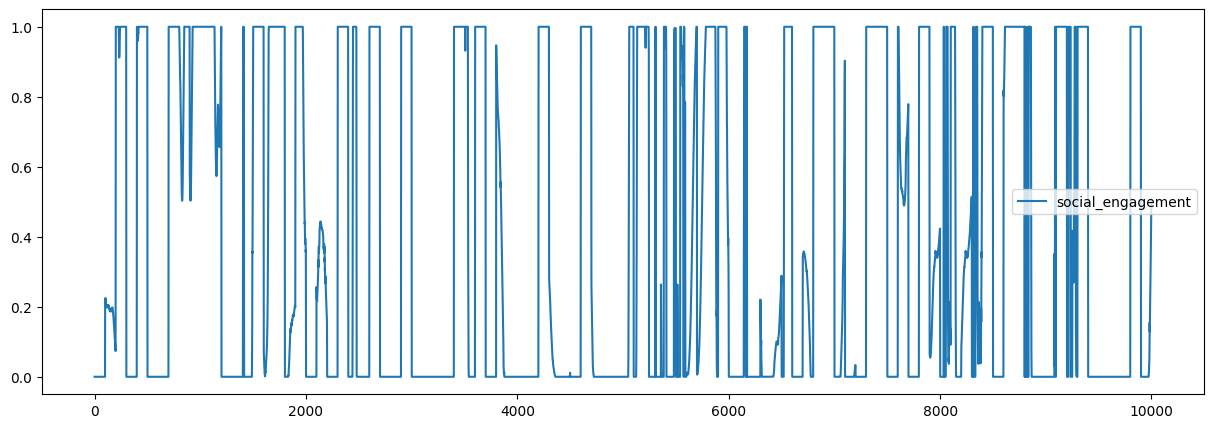

In [30]:
# fig, ax = plt.subplots(figsize=(20,12))
# sns.lineplot(data=int_df, y="social_engagement",x="Frame",hue="ID",ci=None, palette="flare")

# plt.plot(data=int_df, ax=ax, kind='line', x='Frame', y='social_engagement')

int_df.iloc[0:10000][["social_engagement"]].plot(kind="line", figsize=(15,5))


# Clustering

In [31]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Visualise Data Distribution

(array([27399.,   731.,   643.,   682.,   525.,   523.,   616.,   402.,
          323., 15356.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

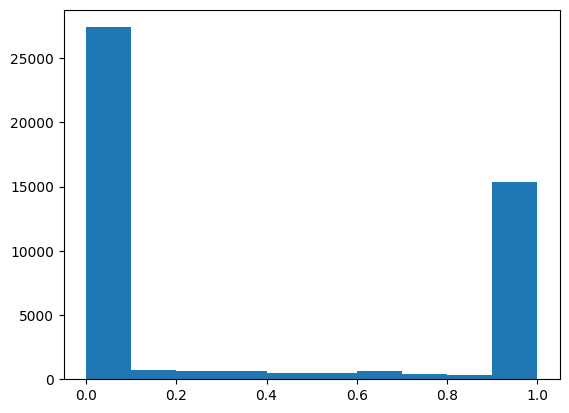

In [32]:
plt.hist(int_df['social_engagement'])

### ___________________________________________________________________

## ________________________________________

In [33]:
int_df['index1'] = int_df.index
new = int_df[['Frame', 'social_engagement']]
new.set_index('Frame', inplace=True)
new = new.T
new

Frame              -50  -49  -48  -47  -46  -45  -44  -43  -42  -41  ...   40  \
social_engagement  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   

Frame               41   42   43   44   45   46   47   48   49  
social_engagement  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 47200 columns]

In [34]:
int_df = int_df.fillna(0)
# int_df = int_df.replace(to_replace=" NULL",value=0)
int_df.isnull().any()
int_df.isnull().sum().sum()

int_df

ID  Frame  social_engagement           soc_eng_with   GROUP  OGINDEX  \
0       5    -50                0.0  social_engagement_5_1  study1     6005   
1       5    -49                0.0  social_engagement_5_1  study1     6006   
2       5    -48                0.0  social_engagement_5_1  study1     6007   
3       5    -47                0.0  social_engagement_5_1  study1     6008   
4       5    -46                0.0  social_engagement_5_1  study1     6009   
...    ..    ...                ...                    ...     ...      ...   
47195   2     45                0.0  social_engagement_3_2  study6    52324   
47196   2     46                0.0  social_engagement_3_2  study6    52325   
47197   2     47                0.0  social_engagement_3_2  study6    52326   
47198   2     48                0.0  social_engagement_3_2  study6    52327   
47199   2     49                0.0  social_engagement_3_2  study6    52328   

       index1  
0           0  
1           1  
2           2  
3           3  
4           4  
...       ...  
47195   47195  
47196   47196  
47197   47197  
47198   47198  
47199   47199  

[47200 rows x 7 columns]

In [90]:
columns_per_row = 100
num_columns = len(new.columns) 

# Calculate the number of resulting rows
num_result_rows = num_columns // columns_per_row + (1 if num_columns % columns_per_row != 0 else 0)
# Initialize an empty DataFrame to store the result
result_list = []


# Loop through the range of rows
for i in range(num_result_rows):
    # Calculate the start and end indices for the current subset of columns
    start_index = i * columns_per_row
    end_index = min((i + 1) * columns_per_row, num_columns)

    ID = int_df['ID'].loc[start_index]
    INDEX = int_df['index1'].loc[start_index]
    GROUP = int_df['GROUP'].loc[start_index]

    subset_df = new.iloc[:, start_index:end_index].copy()
    subset_df['ID'] = ID
    subset_df['OGINDEX'] = INDEX 
    subset_df['GROUP'] = GROUP
    result_list.append(subset_df)    

result_df = pd.DataFrame()
# print (subset_df.columns[subset_df.columns.duplicated(keep=False)])
result_df = pd.concat(result_list)
result_df.reset_index(drop=True, inplace=True)
result_df['ID'] = result_df['ID'].astype(int)

result_df


Frame       -50       -49       -48       -47       -46       -45       -44  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.211379  0.205350  0.205758  0.224928  0.222171  0.217401  0.213032   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      1.000000  1.000000  0.992533  0.992071  0.996926  0.989993  0.972910   
..          ...       ...       ...       ...       ...       ...       ...   
467    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
468    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
469    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
470    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
471    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...       43        44        45  \
0      0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   
1      0.203705  0.206590  0.206474  ...  0.10198  0.097736  0.093524   
2      1.000000  1.000000  1.000000  ...  1.00000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   
4      0.970368  0.959164  0.962239  ...  1.00000  1.000000  1.000000   
..          ...       ...       ...  ...      ...       ...       ...   
467    1.000000  1.000000  1.000000  ...  1.00000  1.000000  1.000000   
468    1.000000  1.000000  1.000000  ...  0.00000  0.000000  0.000000   
469    0.387299  0.391139  0.407174  ...  0.00000  0.000000  0.000000   
470    0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   
471    0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.000000   

Frame        46        47        48        49  ID  OGINDEX   GROUP  
0      0.000000  0.000000  0.000000  0.000000   5        0  study1  
1      0.088611  0.083741  0.078427  0.073444   2      100  study1  
2      1.000000  1.000000  1.000000  1.000000   4      200  study1  
3      0.000000  0.000000  0.000000  0.000000   2      300  study1  
4      1.000000  1.000000  1.000000  1.000000   4      400  study1  
..          ...       ...       ...       ...  ..      ...     ...  
467    1.000000  1.000000  1.000000  1.000000   3    46700  study6  
468    0.000000  0.000000  0.000000  0.000000   2    46800  study6  
469    0.000000  0.000000  0.000000  0.000000   5    46900  study6  
470    0.000000  0.000000  0.000000  0.000000   5    47000  study6  
471    0.000000  0.000000  0.000000  0.000000   2    47100  study6  

[472 rows x 103 columns]

## ______________________________________________________________

In [91]:
select_df = result_df.drop(['ID', 'OGINDEX', 'GROUP'], axis=1)
select_df = select_df.fillna(0)
select_df = select_df.replace(to_replace=" NULL",value=0)
select_df

s = select_df.std(axis=1)
m = select_df.mean(axis=1)

select_df['std'] = s
select_df['mean'] = m
select_df['ID'] = result_df['ID'].values
select_df['OGINDEX'] = result_df['OGINDEX'].values

std_df = select_df
std_df = std_df.loc[std_df['std'] != 0.000000]
std_df = std_df.loc[std_df['std'] > 0.090499]
std_df['GROUP'] = result_df['GROUP']

std_df = std_df.reset_index()
stdd_df = std_df
# stdd_df['GROUP'] = select_df['GROUP'].values
std_df

Frame  index       -50       -49       -48       -47       -46       -45  \
0          8  1.000000  1.000000  0.987772  0.969110  0.948663  0.928404   
1          9  0.607032  0.583048  0.563948  0.546880  0.529279  0.518946   
2         11  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3         14  0.000000  0.000000  0.000000  0.000000  0.296315  0.525046   
4         16  0.086001  0.069951  0.061663  0.051460  0.043821  0.035085   
..       ...       ...       ...       ...       ...       ...       ...   
144      462  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145      463  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146      468  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147      469  0.481144  0.459985  0.436112  0.407776  0.402511  0.385061   
148      471  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -44       -43       -42  ...        45        46        47  \
0      0.911765  0.894542  0.881232  ...  1.000000  1.000000  1.000000   
1      0.509715  0.504803  0.503123  ...  1.000000  1.000000  1.000000   
2      1.000000  1.000000  1.000000  ...  0.940798  0.977336  1.000000   
3      1.000000  1.000000  1.000000  ...  0.405785  0.556372  0.658911   
4      0.028209  0.020379  0.015057  ...  1.000000  1.000000  1.000000   
..          ...       ...       ...  ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  ...  0.067933  0.029124  0.008758   
145    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
147    0.393112  0.387299  0.391139  ...  0.000000  0.000000  0.000000   
148    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Frame        48        49       std      mean  ID  OGINDEX   GROUP  
0      1.000000  1.000000  0.175454  0.870875   1      800  study1  
1      1.000000  1.000000  0.174386  0.904106   1      900  study1  
2      1.000000  1.000000  0.158623  0.828711   4     1100  study1  
3      0.708306  0.824043  0.299278  0.130349   3     1400  study1  
4      1.000000  1.000000  0.454354  0.594838   1     1600  study1  
..          ...       ...       ...       ...  ..      ...     ...  
144    0.000053  0.000000  0.280763  0.829241   1    46200  study6  
145    0.000000  0.000000  0.289450  0.192750   4    46300  study6  
146    0.000000  0.000000  0.493858  0.507880   2    46800  study6  
147    0.000000  0.000000  0.231023  0.203109   5    46900  study6  
148    0.000000  0.000000  0.368453  0.160000   2    47100  study6  

[149 rows x 106 columns]

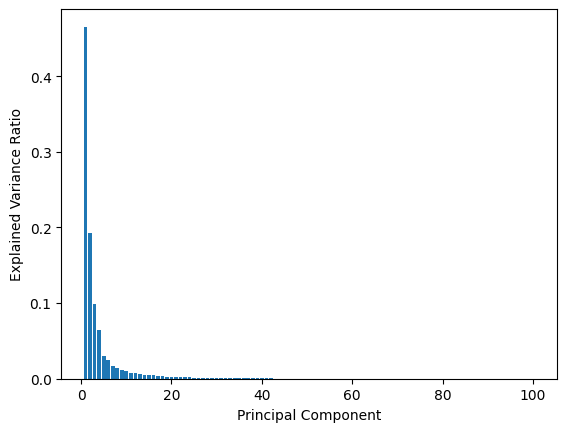

Original DataFrame:
Frame       -50       -49       -48       -47       -46       -45       -44  \
0      1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1      0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4      0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..          ...       ...       ...       ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42      

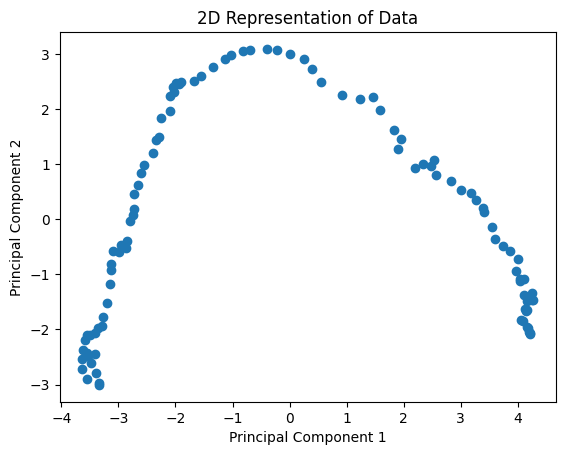

In [92]:
std_df = std_df.rename(str,axis="columns")
std_df = std_df.drop('std', axis=1)
std_df = std_df.drop('mean', axis=1)
std_df = std_df.drop('index', axis=1)
std_df = std_df.drop('ID', axis=1)
std_df = std_df.drop('OGINDEX', axis=1)
std_df = std_df.drop('GROUP', axis=1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(std_df.T)

# Perform PCA
pca = PCA()
#pca_result = pca.fit_transform(scaled_data)

pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Choose the number of components based on the explained variance
num_components = 5
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(std_df.T)

# Create a new DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(data=pca_result, columns=pc_columns)



# Display the results
print("Original DataFrame:")
print(std_df)
print("\nDataFrame after PCA:")
print(df_pca)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Data')
plt.show()

In [93]:
pca_result
pca_result = (pca_result-pca_result.min())/(pca_result.max()-pca_result.min())
# df_norm

In [94]:
pca_result_df = pd.DataFrame(pca_result)
pca_result_df.index -= 50
pca_result_df

0         1         2         3         4
-50  0.973831  0.229097  0.263579  0.333358  0.362249
-49  0.977724  0.226429  0.259463  0.332543  0.364156
-48  0.983738  0.249278  0.269741  0.313682  0.354927
-47  0.982736  0.252689  0.269052  0.314351  0.355435
-46  0.986864  0.250713  0.266317  0.307981  0.350795
..        ...       ...       ...       ...       ...
 45  0.000000  0.115720  0.703465  0.320601  0.442406
 46  0.011046  0.092328  0.736673  0.308012  0.424582
 47  0.037312  0.083096  0.748369  0.272135  0.432900
 48  0.037102  0.079159  0.761580  0.262056  0.430990
 49  0.030957  0.107595  0.744490  0.266553  0.437758

[100 rows x 5 columns]

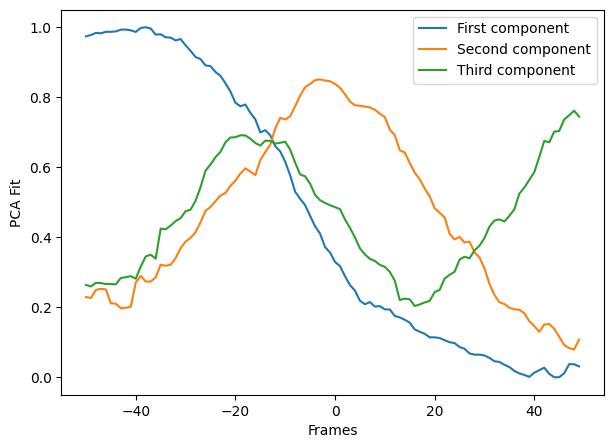

In [95]:
fig, ax = plt.subplots(figsize=(7, 5))

line1, = ax.plot(pca_result_df[0])
line2, = ax.plot(pca_result_df[1])
line3, = ax.plot(pca_result_df[2])

plt.xlabel('Frames')
plt.ylabel('PCA Fit')

ax.legend([line1, line2, line3], ['First component', 'Second component', 'Third component'])

0          1          2          3          4
0    35.363904  39.368948  38.608051  38.920125  40.005319
1    36.592317  43.318758  42.708586  42.241285  41.524595
2    42.484833  36.274985  38.764337  38.365395  37.793626
3     8.844857   2.551316   5.689814   4.173315   5.570929
4    10.547822  28.682652  26.440186  26.567736  27.678686
..         ...        ...        ...        ...        ...
144  42.493937  41.223679  34.914301  38.942047  38.603477
145   6.118759  14.610487   8.243272   7.210216   9.169670
146  40.767079  25.043892  25.157195  22.980029  23.119395
147  17.219830   9.326224  10.347202   9.987654   8.882230
148   1.988559   6.878944   7.502525   6.844535   8.402401

[149 rows x 5 columns]

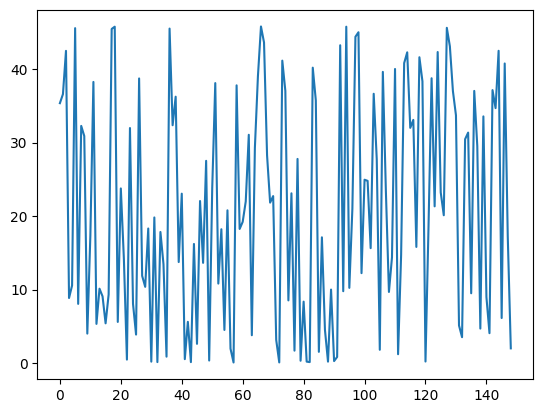

In [98]:
std_df.dot(pca_result)[0].plot()
projected_interactions = std_df.dot(pca_result) 
#the spikes: how they've responded to the PCA

projected_interactions_df = pd.DataFrame(projected_interactions)
projected_interactions_df

<Axes: >

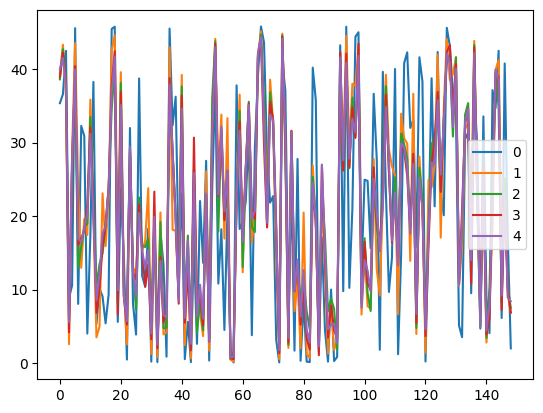

In [97]:
projected_interactions_df.plot()

Number of clusters from 3 to 7: 
 [3, 4, 5, 6]
For n_clusters = 3, silhouette score is 0.44937280234147975)
For n_clusters = 4, silhouette score is 0.4650803969089408)
For n_clusters = 5, silhouette score is 0.460999497336941)
For n_clusters = 6, silhouette score is 0.4384131793324342)


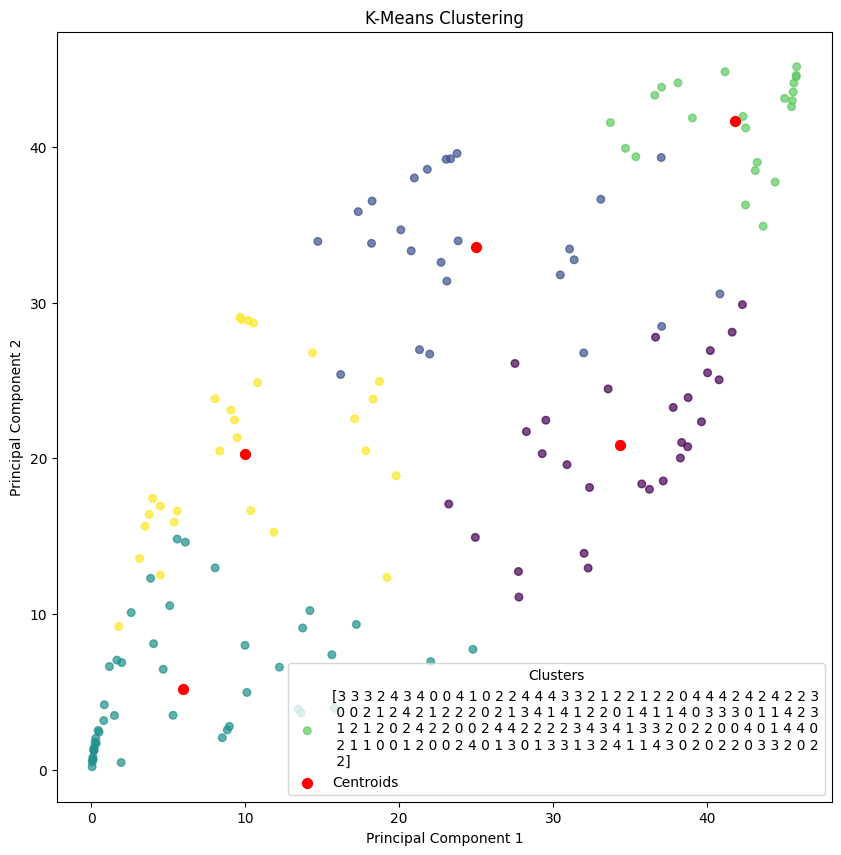

In [130]:
# Convert DataFrame to matrix
X = projected_interactions_df[[0, 1, 2, 3, 4]]

kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
projected_interactions_df['Cluster'] = kmeans.labels_

##Optimum k
from sklearn.metrics import silhouette_score
#Use silhouette score
range_n_clusters = list (range(3,7))
print ("Number of clusters from 3 to 7: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
           
##############

# plt.scatter(X[0], X[1], c=kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label='Centroids')
# ax.set_xlabel("Principal Component 1")
# ax.set_ylabel("Principal Component 2")

fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot with color based on cluster labels (adjust marker size/alpha if needed)
scatter = plt.scatter(X[0], X[1], c=kmeans.labels_.astype(float), s=30, alpha=0.7, cmap='viridis', label=kmeans.labels_)
# Scatter plot for centroids (red)
centroids = kmeans.cluster_centers_
centroids_plot = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label='Centroids')

# Customize labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2") 
ax.set_title("K-Means Clustering")

# Get unique cluster labels using NumPy's unique function
unique_labels = np.unique(kmeans.labels_)
descriptive_labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]  # Adjust as needed
# Create descriptive labels for clusters (optional: limit number shown)
cluster_labels = [f"Cluster {label}" for label in unique_labels]

# Legend for clusters (adjust placement or limit labels if needed)
plt.legend(title="Clusters")
plt.show()



<Axes: xlabel='Frame'>

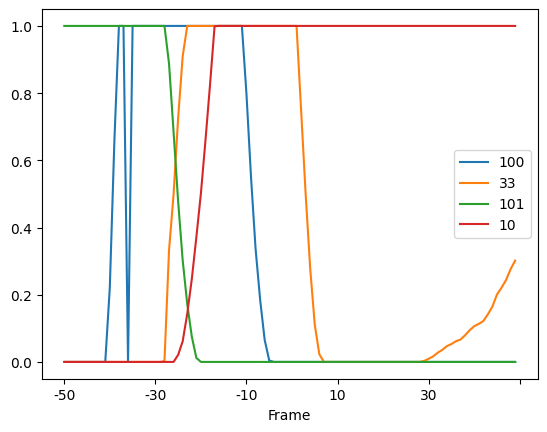

In [44]:
std_df.iloc[100].plot(legend=True)
std_df.iloc[33].plot(legend=True)
std_df.iloc[101].plot(legend=True)
std_df.iloc[10].plot(legend=True)

# std_df.iloc[100].plot()

<Axes: xlabel='Frame'>

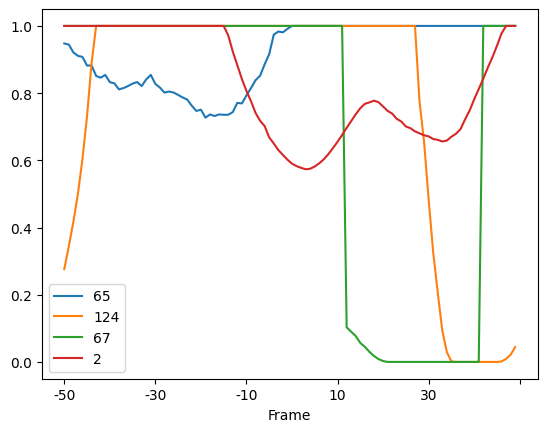

In [45]:
std_df.iloc[65].plot(legend=True)
std_df.iloc[124].plot(legend=True)
std_df.iloc[67].plot(legend=True)
std_df.iloc[2].plot(legend=True)


<Axes: xlabel='Frame'>

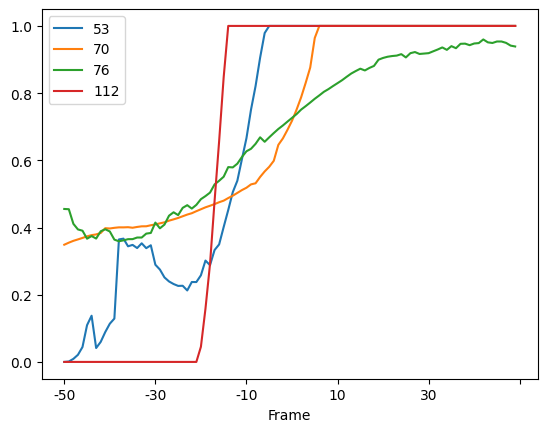

In [46]:
std_df.iloc[53].plot(legend=True)
std_df.iloc[70].plot(legend=True)
std_df.iloc[76].plot(legend=True)
std_df.iloc[112].plot(legend=True)

In [47]:
# sns.lineplot(data=std_df[std_df["ID"].isin(["53","70"])],y="social_engagement",x="Frame",hue="ID")
# int_df[int_df["ID"].isin(["53","70"])]

<Axes: xlabel='Frame'>

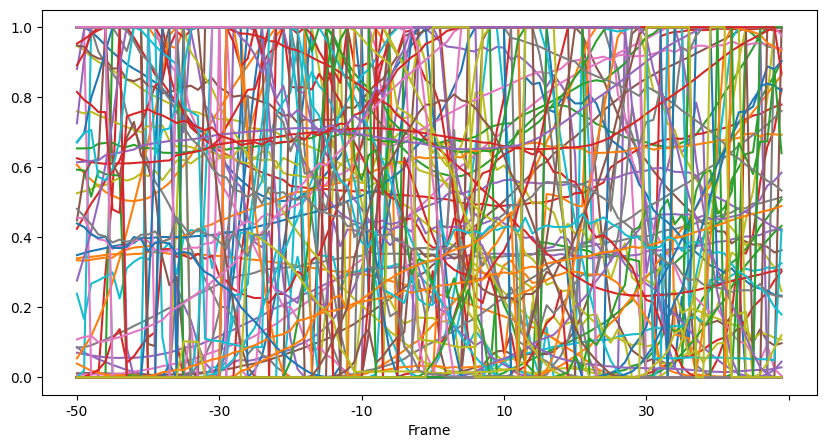

In [48]:
std_df.T.plot(legend=None,figsize=(10,5))

In [49]:
std_df['Cluster'] = projected_interactions_df['Cluster']
std_df['ID'] = stdd_df['ID']
std_df['OGINDEX'] = stdd_df['OGINDEX']
std_df['index'] = stdd_df['index']
std_df['std'] = stdd_df['std']
std_df['mean'] = stdd_df['mean']
std_df['GROUP'] = stdd_df['GROUP']
std_df

Frame       -50       -49       -48       -47       -46       -45       -44  \
0      1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1      0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4      0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..          ...       ...       ...       ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...        47        48        49  \
0      0.894542  0.881232  0.870084  ...  1.000000  1.000000  1.000000   
1      0.504803  0.503123  0.506511  ...  1.000000  1.000000  1.000000   
2      1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
3      1.000000  1.000000  1.000000  ...  0.658911  0.708306  0.824043   
4      0.020379  0.015057  0.010384  ...  1.000000  1.000000  1.000000   
..          ...       ...       ...  ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  ...  0.008758  0.000053  0.000000   
145    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  ...  0.000000  0.000000  0.000000   
147    0.387299  0.391139  0.407174  ...  0.000000  0.000000  0.000000   
148    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

Frame  Cluster  ID  OGINDEX  index       std      mean   GROUP  
0            2   1      800      8  0.175454  0.870875  study1  
1            2   1      900      9  0.174386  0.904106  study1  
2            2   4     1100     11  0.158623  0.828711  study1  
3            4   3     1400     14  0.299278  0.130349  study1  
4            1   1     1600     16  0.454354  0.594838  study1  
..         ...  ..      ...    ...       ...       ...     ...  
144          2   1    46200    462  0.280763  0.829241  study6  
145          4   4    46300    463  0.289450  0.192750  study6  
146          3   2    46800    468  0.493858  0.507880  study6  
147          0   5    46900    469  0.231023  0.203109  study6  
148          4   2    47100    471  0.368453  0.160000  study6  

[149 rows x 107 columns]

TypeError: can only concatenate tuple (not "int") to tuple

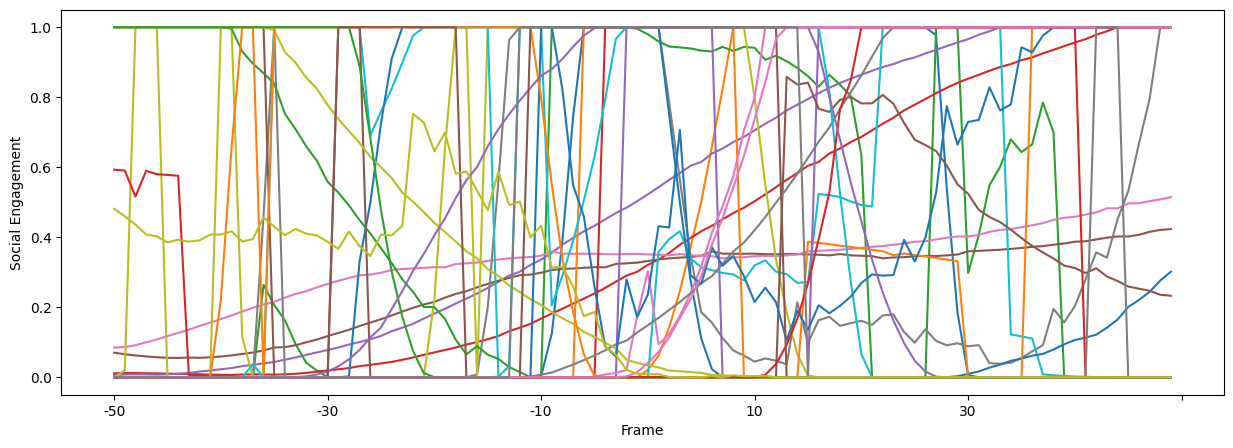

In [51]:
grp = std_df.groupby(by=["Cluster"])

for name, groups in grp:
    groups.iloc[:, : 100].T.plot(legend=None,figsize=(15,5))
    plt.ylabel('Social Engagement')
    plt.title(int(name+1))
    plt.show()


In [52]:
grp = std_df.groupby(by=["Cluster"])

for name, groups in grp:
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(groups[['OGINDEX','Cluster', 'ID', 'std', 'index']])  

Frame  OGINDEX  Cluster  ID       std  index
6         2400        0   4  0.472095     24
9         5000        0   4  0.487126     50
14        5500        0   3  0.436196     55
15        5600        0   2  0.366215     56
16        5700        0   2  0.379626     57
24        7900        0   5  0.119733     79
27        8200        0   5  0.101863     82
28        8300        0   1  0.375016     83
29        8800        0   1  0.464560     88
31        9200        0   1  0.430531     92
33       10400        0   4  0.427766    104
42       13100        0   1  0.439395    131
46       14400        0   4  0.368942    144
52       16100        0   3  0.484790    161
54       16900        0   4  0.497570    169
60       20100        0   1  0.401844    201
63       21000        0   2  0.474948    210
71       22600        0   1  0.437374    226
78       28200        0   2  0.390425    282
80       29100        0   3  0.425655    291
87       30000        0   5  0.375634    300
100      3

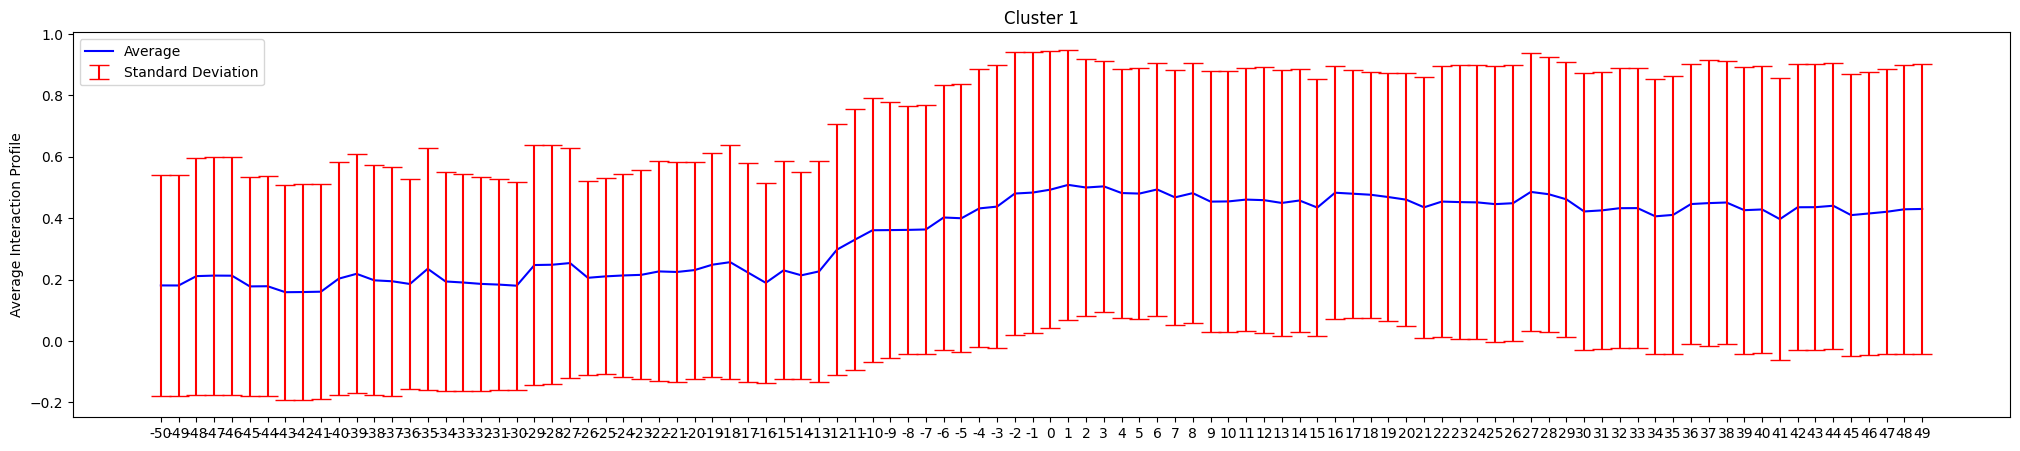

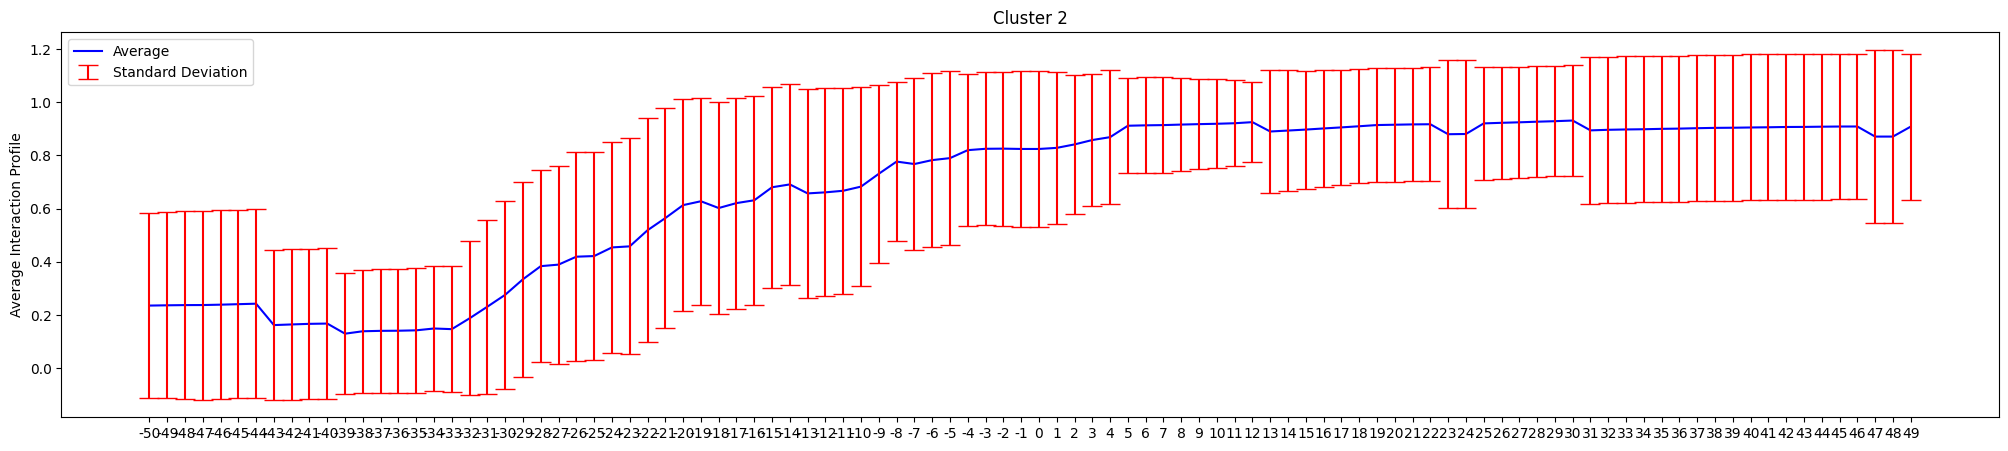

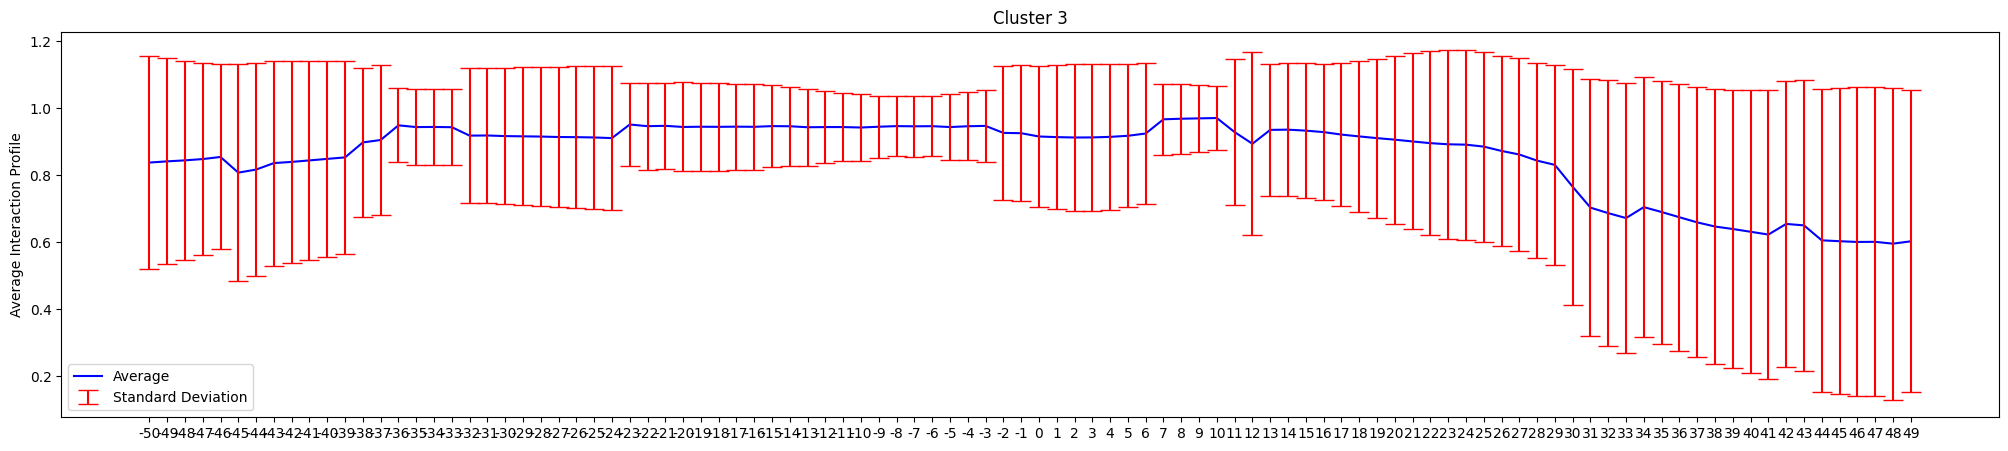

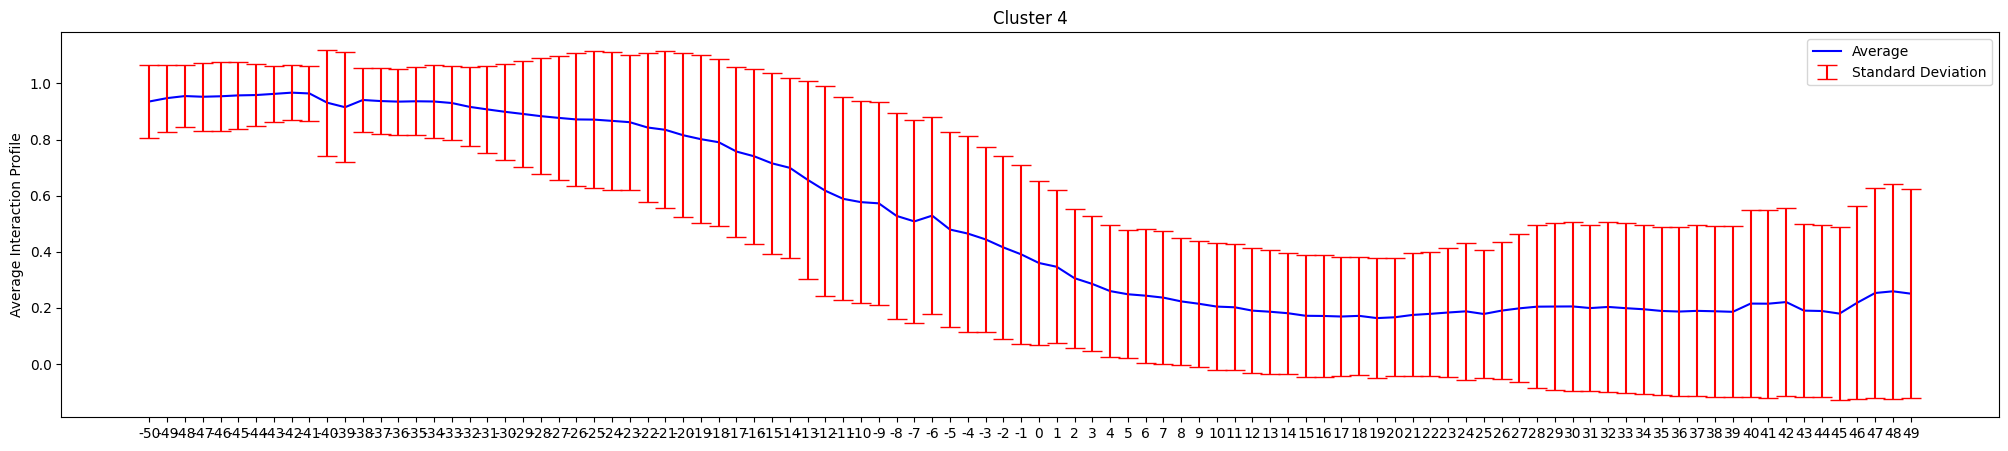

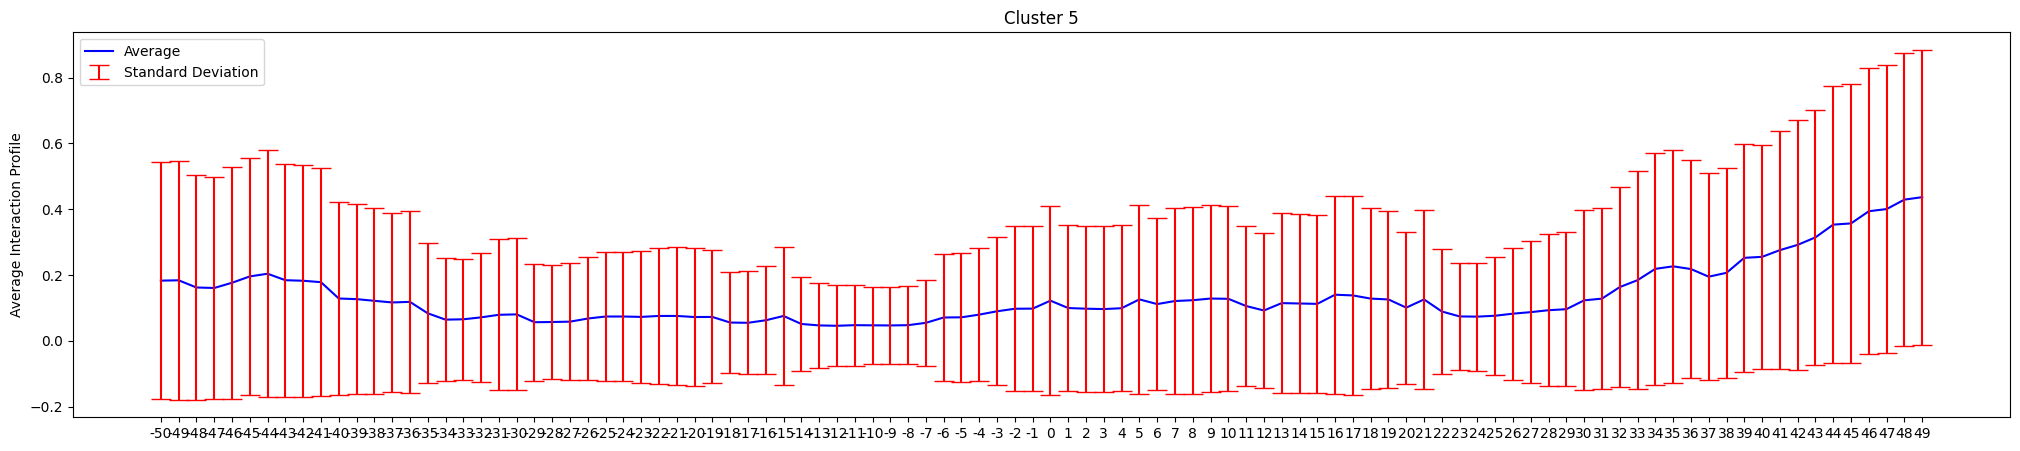

In [88]:
grp = std_df.groupby(by=["Cluster"])

# Avg profile and standard deviation of cluster
for name, data in grp:
    data = data.drop(['std', 'ID', 'OGINDEX', 'Cluster', 'index', 'mean', 'GROUP', 'Framez'], axis=1)
    avg = data.mean(axis=0)
    std_dev = data.std(axis=0)

    fig, ax = plt.subplots(figsize=(25, 5))  # Add figsize for larger plots
    ax.set_title(f"Cluster {int(name[0]) + 1}")  # formatted title with cluster number
    ax.set_ylabel("Average Interaction Profile")

    # Plot average profile
    ax.plot(avg, label='Average', color='blue')

    # Plot error bars (standard deviation)
    ax.errorbar(avg.index, avg, yerr=std_dev, fmt='none', ecolor='red', capsize=7, label='Standard Deviation')
    ax.legend()  # Add legend for average and standard deviation

plt.show()


In [ ]:
full_df = pd.merge(std_df, data_df, left_on='OGINDEX', right_on='Frame', how='inner')
full_df

In [ ]:
interaction_counts = std_df.groupby(['ID'])['GROUP'].value_counts()
interaction_counts_df = interaction_counts.reset_index(name='occurrences')
interaction_counts_df['Cluster'] = std_df['Cluster']
# interaction_counts_df = interaction_counts_df.sort_values(by='GROUP')
interaction_counts_df

In [ ]:
# grp = full_df.groupby(by=["Cluster"])

# length = 10

# for name, data in grp:
#     for i, row in data.iterrows():
#         if i == ID:
#             continue
#         else:
#             ID = int(row["ID"])
#             x = row['{}TX'.format(ID)]
#             y = row['{}TY'.format(ID)]
#             yaw = row['{}TZ'.format(ID)]
    
#         plt.scatter(x, y, s=100, label=ID)
#         plt.arrow(
#             x,
#             y,
#             length * np.cos(yaw),
#             length * np.sin(yaw),
#             head_width=70,
#             head_length=70,
#             color="#82ad9d",
#             lw=1,
#         )
#         plt.arrow(
#             x,
#             y,
#             length * np.cos(yaw - fov_angle),
#             length * np.sin(yaw - fov_angle),
#             head_width=70,
#             head_length=70,
#             color="#82ad9d",
#             lw=1,
#         )
#         plt.arrow(
#             x,
#             y,
#             length * np.cos(yaw + fov_angle),
#             length * np.sin(yaw + fov_angle),
#             head_width=70,
#             head_length=70,
#             color="#82ad9d",
#             lw=1,
#         )
        
#     plt.xlim(-4000, 4000)
#     plt.ylim(-4000, 4000)
#     plt.legend(loc="upper left")
#     plt.show()


In [54]:
VICON_FPS = 100
VIDEO_FPS = 20

for index, row in std_df.iterrows():
    frame = row['OGINDEX']
    frame = (int(frame)/VICON_FPS)*VIDEO_FPS
    std_df.at[index,'Framez'] = int(frame)

std_df

Frame       -50       -49       -48       -47       -46       -45       -44  \
0      1.000000  1.000000  0.987772  0.969110  0.948663  0.928404  0.911765   
1      0.607032  0.583048  0.563948  0.546880  0.529279  0.518946  0.509715   
2      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3      0.000000  0.000000  0.000000  0.000000  0.296315  0.525046  1.000000   
4      0.086001  0.069951  0.061663  0.051460  0.043821  0.035085  0.028209   
..          ...       ...       ...       ...       ...       ...       ...   
144    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
145    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
147    0.481144  0.459985  0.436112  0.407776  0.402511  0.385061  0.393112   
148    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Frame       -43       -42       -41  ...        48        49  Cluster  ID  \
0      0.894542  0.881232  0.870084  ...  1.000000  1.000000        2   1   
1      0.504803  0.503123  0.506511  ...  1.000000  1.000000        2   1   
2      1.000000  1.000000  1.000000  ...  1.000000  1.000000        2   4   
3      1.000000  1.000000  1.000000  ...  0.708306  0.824043        4   3   
4      0.020379  0.015057  0.010384  ...  1.000000  1.000000        1   1   
..          ...       ...       ...  ...       ...       ...      ...  ..   
144    1.000000  1.000000  1.000000  ...  0.000053  0.000000        2   1   
145    0.000000  0.000000  0.000000  ...  0.000000  0.000000        4   4   
146    1.000000  1.000000  1.000000  ...  0.000000  0.000000        3   2   
147    0.387299  0.391139  0.407174  ...  0.000000  0.000000        0   5   
148    0.000000  0.000000  0.000000  ...  0.000000  0.000000        4   2   

Frame  OGINDEX  index       std      mean   GROUP  Framez  
0          800      8  0.175454  0.870875  study1   160.0  
1          900      9  0.174386  0.904106  study1   180.0  
2         1100     11  0.158623  0.828711  study1   220.0  
3         1400     14  0.299278  0.130349  study1   280.0  
4         1600     16  0.454354  0.594838  study1   320.0  
..         ...    ...       ...       ...     ...     ...  
144      46200    462  0.280763  0.829241  study6  9240.0  
145      46300    463  0.289450  0.192750  study6  9260.0  
146      46800    468  0.493858  0.507880  study6  9360.0  
147      46900    469  0.231023  0.203109  study6  9380.0  
148      47100    471  0.368453  0.160000  study6  9420.0  

[149 rows x 108 columns]

In [55]:
projected_interactions_df
# projected_interactions_df = projected_interactions_df.rename_axis('Frame', axis=1)
projected_interactions_df.rename(columns={0:'One'}, inplace=True)
projected_interactions_df.rename(columns={1:'Two'}, inplace=True)
projected_interactions_df.rename(columns={2:'Three'}, inplace=True)
projected_interactions_df.rename(columns={3:'Four'}, inplace=True)
projected_interactions_df.rename(columns={4:'Five'}, inplace=True)
projected_interactions_df

One        Two      Three       Four       Five  Cluster
0    35.363904  39.368948  38.608051  38.920125  40.005319        2
1    36.592317  43.318758  42.708586  42.241285  41.524595        2
2    42.484833  36.274985  38.764337  38.365395  37.793626        2
3     8.844857   2.551316   5.689814   4.173315   5.570929        4
4    10.547822  28.682652  26.440186  26.567736  27.678686        1
..         ...        ...        ...        ...        ...      ...
144  42.493937  41.223679  34.914301  38.942047  38.603477        2
145   6.118759  14.610487   8.243272   7.210216   9.169670        4
146  40.767079  25.043892  25.157195  22.980029  23.119395        3
147  17.219830   9.326224  10.347202   9.987654   8.882230        0
148   1.988559   6.878944   7.502525   6.844535   8.402401        4

[149 rows x 6 columns]

In [56]:
projected_interactions_df
projected_interactions_df = projected_interactions_df.drop('Cluster', axis=1)
std_df
clus_df = pd.concat([std_df, projected_interactions_df], axis=1)
print(clus_df.columns.tolist())

['-50', '-49', '-48', '-47', '-46', '-45', '-44', '-43', '-42', '-41', '-40', '-39', '-38', '-37', '-36', '-35', '-34', '-33', '-32', '-31', '-30', '-29', '-28', '-27', '-26', '-25', '-24', '-23', '-22', '-21', '-20', '-19', '-18', '-17', '-16', '-15', '-14', '-13', '-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', 'Cluster', 'ID', 'OGINDEX', 'index', 'std', 'mean', 'GROUP', 'Framez', 'One', 'Two', 'Three', 'Four', 'Five']


Cluster
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
Name: One, dtype: object

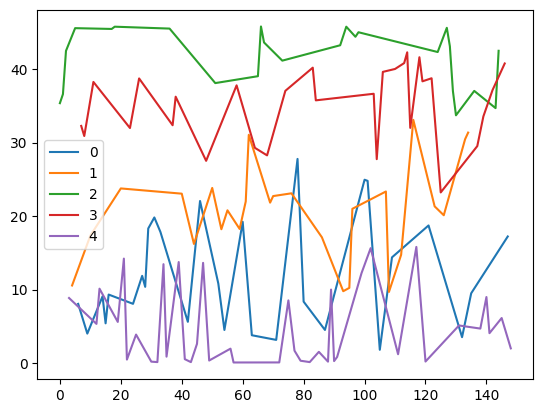

In [57]:
clus_df.groupby('Cluster')['One'].plot(legend=True)
# clus_df.groupby('Cluster')['Two'].plot(legend=True)
# clus_df.groupby('Cluster')['Three'].plot(legend=True)
# clus_df.groupby('Cluster')['Four'].plot(legend=True)
# clus_df.groupby('Cluster')['Five'].plot(legend=True)

ValueError: Using `title` of type `list` is not supported unless `subplots=True` is passed

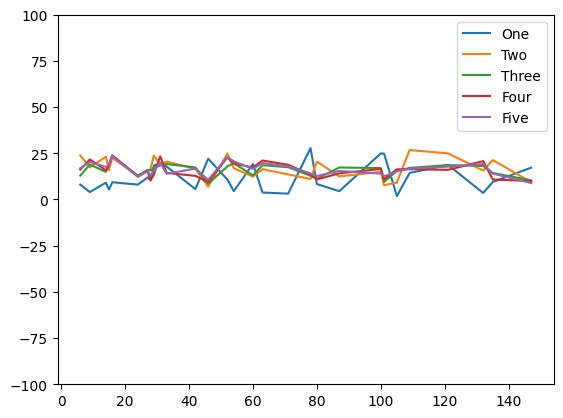

In [58]:
grp = clus_df.groupby(by=["Cluster"])

for name, data in grp:
    ax= data[['One', 'Two', 'Three', 'Four', 'Five']].plot(title=name, ylim=(-100,100))  
#     plt.xlabel('Framez')
    

In [ ]:
ax = clus_df.plot.hist(column=["Zero", "One", "Two", "Three", "Four"], by="Cluster", figsize=(10, 8))

In [59]:
#is participant always in same cluster?

# Group by "GROUP" column
grouped_by_group = std_df.groupby(by=["GROUP"])

# Iterate over groups
for group_name, group_data in grouped_by_group:
    print(f"Group {group_name}:")
    
    # Group data within each group by "Cluster" column
    grouped_by_cluster = group_data.groupby(by=["Cluster"])
    
    # Count occurrences of each ID within the cluster
    id_counts = grouped_by_cluster['ID'].value_counts()

    print(id_counts)

    

Group ('study1',):
Cluster  ID
0        4     1
1        1     1
         2     1
2        1     3
         2     1
         4     1
3        4     2
         5     1
4        3     1
         4     1
         5     1
Name: count, dtype: int64
Group ('study2',):
Cluster  ID
0        2     3
         3     2
         4     1
         5     1
1        1     1
         2     1
         4     1
2        4     2
         2     1
3        3     2
         1     1
         5     1
4        1     4
         3     3
         4     3
         2     2
         5     2
Name: count, dtype: int64
Group ('study3',):
Cluster  ID
0        1     3
         4     3
         5     3
         2     1
1        4     2
         5     2
         1     1
         2     1
         3     1
2        1     2
         4     1
         5     1
3        1     3
         2     3
         3     2
4        5     3
         1     2
         3     2
         2     1
         4     1
Name: count, dtype: int64
Group ('study

In [60]:
counts = std_df.groupby(['Cluster', 'GROUP'])['ID'].value_counts()
counts_df = counts.reset_index(name='occurrences')
counts_df

Cluster   GROUP  ID  occurrences
0         0  study1   4            1
1         0  study2   2            3
2         0  study2   3            2
3         0  study2   4            1
4         0  study2   5            1
..      ...     ...  ..          ...
88        4  study5   3            1
89        4  study5   5            1
90        4  study6   4            3
91        4  study6   1            1
92        4  study6   2            1

[93 rows x 4 columns]

In [61]:
#How many people in same ish cluster?
grp = std_df.groupby(by=["GROUP"])

for name, data in grp:
    print(data['ID'].value_counts())
    
    

ID
4    5
1    4
5    2
2    2
3    1
Name: count, dtype: int64
ID
4    7
3    7
2    7
1    6
5    4
Name: count, dtype: int64
ID
1    11
5     9
4     7
2     6
3     5
Name: count, dtype: int64
ID
1    10
3     6
4     5
2     3
5     1
Name: count, dtype: int64
ID
5    5
4    4
3    4
2    2
Name: count, dtype: int64
ID
4    9
1    5
2    5
5    4
3    3
Name: count, dtype: int64


# Correlations between social engagement profiles and personality

In [62]:
file = Path("big5.csv")
big5_df = pd.read_csv(file)

/tmp/ipykernel_53800/52850351.py:93: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (5).

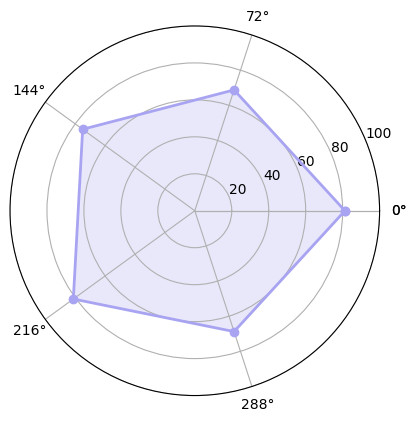

In [63]:
emotional_stability = 0
extraversion = 0
agreeableness = 0
conscientiousness = 0
intellect = 0

par = []
es = []
ex = []
ag = []
co = []
ig = []
age = []
sex = []
country = []
helmet = []
group = []

big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]

dfbig5 = pd.DataFrame()  

for index, row in big5_df.iterrows():

    participant = row['p_id']
    r = lambda: random.randint(0,255)
    
    ec = row['n1'] + row['n2'] + row['n3'] + row['n4']
    e = row['e1'] + row['e2'] + row['e3'] + row['e4']
    a = row['a1'] + row['a2'] + row['a3'] + row['a4']
    c = row['c1'] + row['c2'] + row['c3'] + row['c4']
    i = row['i1'] + row['i2'] + row['i3'] + row['i4']
    
    p_age = row['age']
    p_sex = row['gender']
    p_country = row['culture']
    
    emotional_stability = (ec/16)*100
    extraversion = (e/16)*100
    agreeableness = (a/16)*100
    conscientiousness = (c/16)*100
    intellect = (i/16)*100

    values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]
    
    par.append(participant)
    es.append(emotional_stability)
    ex.append(extraversion)
    ag.append(agreeableness)
    co.append(conscientiousness)
    ig.append(intellect)
    age.append(p_age)
    sex.append(p_sex)
    country.append(p_country)
    helmet.append(row['helmet'])
    group.append(row['group'])
    
# dfbig5["participant"] = par
dfbig5["emotional_stability"] = es
dfbig5["extraversion"] = ex
dfbig5["agreeableness"] = ag
dfbig5["conscientiousness"] = co
dfbig5["intellect"] = ig
dfbig5["helmet"] = helmet
dfbig5["group"] = group
dfbig5["age"] = age
dfbig5["culture"] = country
dfbig5["gender"] = sex

emotional_stability = (ec/16)*100
extraversion = (e/16)*100
agreeableness = (a/16)*100
conscientiousness = (c/16)*100
intellect = (i/16)*100

values = [emotional_stability,extraversion,agreeableness,conscientiousness,intellect]

es.append(emotional_stability)
ex.append(extraversion)
ag.append(agreeableness)
co.append(conscientiousness)
ig.append(intellect)


angles=np.linspace(0, 2*np.pi, len(big5), endpoint=False)
stats=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
graph_color = ('#%02X%02X%02X' % (r(),r(),r()))
ax = fig.add_subplot(111, polar=True)  # Set polar axis
plt.ylim(0,100) # axis 0-100
ax.plot(angles, stats, 'o-', linewidth=2, linestyle="solid", color=graph_color) # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.25, color=graph_color)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, big5)  # Set the label for each axis
ax.grid(True)

print(es) 

In [ ]:
# grp = dfbig5.groupby(by=["group"])

# for group, data in grp:
    # interaction_profiles = interaction_profiles[interaction_profiles["ID"].isin(group1.reset_index()["helmet"])]
soceng_mean = interaction_profiles.groupby(["GROUP", "ID"])["social_engagement_mean"].mean().reset_index()
# soceng_mean = soceng_mean.set_index("ID")

soceng_std = interaction_profiles.groupby(["GROUP", "ID"])["social_engagement_std"].mean().reset_index()
# soceng_std.index = np.arange(1, len(soceng_std) + 1)
# soceng_dfbig5std = soceng_std.set_index("ID")
soceng_std

In [ ]:
interaction_profiles_after = interaction_profiles[interaction_profiles["Frame"]>0]
interaction_profiles_before = interaction_profiles[interaction_profiles["Frame"]<0]

soceng_after_mean = interaction_profiles_after.groupby(["ID", "GROUP"])["social_engagement_mean"].mean().reset_index()
soceng_after_mean = soceng_after_mean.rename(columns={"social_engagement_mean":"social_engagement_after"})

soceng_before_mean = interaction_profiles_before.groupby(["ID", "GROUP"])["social_engagement_mean"].mean().reset_index()
soceng_before_mean = soceng_before_mean.rename(columns={"social_engagement_mean":"social_engagement_before"})

soceng_before_delta = soceng_after_mean.rename(columns={"social_engagement_after":"social_engagement_delta"})
soceng_before_delta["social_engagement_delta"] -= soceng_before_mean["social_engagement_before"]


interaction_profiles

In [64]:
dfbig5
dfbig5= dfbig5.drop(20)
dfbig5 = dfbig5.reset_index(drop=True)
dfbig5 = dfbig5.sort_values(['group','helmet'], ascending=[True, True])
dfbig5

emotional_stability  extraversion  agreeableness  conscientiousness  \
4                 68.75         81.25          75.00              68.75   
1                 75.00         81.25          87.50              68.75   
2                 75.00         81.25          75.00              93.75   
0                 75.00         68.75          75.00              43.75   
3                 75.00         81.25          81.25              81.25   
9                 87.50         68.75          68.75              75.00   
5                 68.75         68.75          75.00              68.75   
7                106.25         68.75          75.00             100.00   
6                 81.25         68.75          68.75             112.50   
8                 68.75         68.75          81.25             100.00   
12               100.00         62.50          56.25              87.50   
13                68.75         81.25          75.00              75.00   
14                75.00         68.75          81.25              68.75   
11                62.50         75.00          68.75              75.00   
10                62.50         68.75          75.00              68.75   
15                81.25         75.00          75.00              68.75   
16                93.75         75.00          75.00              68.75   
17                75.00         75.00          75.00              87.50   
18                68.75         81.25          87.50              68.75   
19                62.50         81.25          93.75              81.25   
22                75.00         87.50          75.00              75.00   
20                87.50         81.25          81.25              68.75   
23                93.75         81.25          81.25              62.50   
21                87.50         62.50          81.25              93.75   
25                75.00         62.50          62.50              50.00   
28                81.25         68.75          75.00              81.25   
27                75.00         93.75          93.75              56.25   
24                43.75         68.75          81.25              87.50   
26                68.75         68.75          56.25              62.50   

    intellect  helmet  group  age culture  gender  
4       75.00       1      1   34      NG    male  
1       75.00       2      1   29      GB   other  
2       81.25       3      1   28      GR    male  
0       68.75       4      1   30      GB    male  
3       75.00       5      1   28      GB    male  
9       62.50       1      2   29      GB    male  
5       75.00       2      2   28      GB    male  
7       68.75       3      2   30      GB    male  
6       75.00       4      2   32      GB  female  
8       75.00       5      2   34      GB    male  
12      75.00       1      3   26      PT    male  
13      62.50       2      3   34      IT  female  
14      75.00       3      3   27      GB  female  
11      87.50       4      3   24      GB    male  
10      68.75       5      3   40      GB    male  
15      81.25       1      4   53      GB  female  
16      81.25       2      4   34      CO  female  
17      68.75       3      4   59      GB    male  
18      68.75       4      4   38      HK  female  
19      56.25       5      4   34      LK    male  
22      75.00       2      5   53      GB    male  
20      68.75       3      5   26      TH    male  
23      68.75       4      5   29      GB  female  
21      68.75       5      5   46      GB    male  
25      75.00       1      6   28      GB    male  
28      68.75       2      6   34      GB    male  
27      62.50       3      6   30      GB    male  
24      62.50       4      6   26      GB    male  
26      81.25       5      6   28      GB  female

In [65]:
big5 = ["emotional_stability", "extraversion", "agreeableness", "conscientiousness", "intellect"]
df_corr = pd.concat([soceng_mean, soceng_std, soceng_after_mean, soceng_before_mean, soceng_before_delta], axis=1)
df_corr = df_corr.loc[:,~df_corr.columns.duplicated()].copy()
df_corr.index = np.arange(1, len(df_corr) + 1)

dfbig5 = dfbig5.rename(columns={"helmet": "ID", "group": "GROUP"})

df_corr['ID'] = df_corr['ID'].astype(int)

for idx, name in df_corr.iterrows():
    new = name['GROUP'][-1]
    df_corr.loc[idx, 'GROUP'] = new

df_corr['ID'] = df_corr['ID'].astype(int)
df_corr['GROUP'] = df_corr['GROUP'].astype(int)

dfbig5['ID'] = dfbig5['ID'].astype(int)
dfbig5['GROUP'] = dfbig5['GROUP'].astype(int)

full_corr = pd.merge(dfbig5, df_corr, on=['GROUP', 'ID'])
full_corr


NameError: name 'soceng_mean' is not defined

In [66]:
interaction_counts_df['ID'] = interaction_counts_df['ID'].astype(int)
# interaction_counts_df['GROUP'] = interaction_counts_df['GROUP'][-1]
for idx, name in interaction_counts_df.iterrows():
    new = name['GROUP'][-1]
    interaction_counts_df.loc[idx, 'GROUP'] = new
interaction_counts_df['GROUP'] = interaction_counts_df['GROUP'].astype(int)

full_corr = pd.merge(full_corr, interaction_counts_df, on=['GROUP', 'ID'])
full_corr

NameError: name 'interaction_counts_df' is not defined

In [67]:
interaction_counts_df

NameError: name 'interaction_counts_df' is not defined

In [68]:
# sns.displot(data=full_corr[big5], kde=True)

plt.hist(full_corr[big5], ec='black', bins=5)

NameError: name 'full_corr' is not defined

In [69]:
big5

['emotional_stability',
 'extraversion',
 'agreeableness',
 'conscientiousness',
 'intellect']

In [70]:
soceng_mean= soceng_mean.drop(20)
soceng_mean = soceng_mean.reset_index(drop=True)
soceng_mean

NameError: name 'soceng_mean' is not defined

In [71]:
interaction_counts_df

NameError: name 'interaction_counts_df' is not defined

In [72]:
#CORR INTERACTION COUNT AND BIG 5
for cat in big5+ ["age"]:
    print("no. of interactions <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], interaction_counts_df["occurrences"])))
print("===================================================")

NameError: name 'full_corr' is not defined

In [ ]:
for cat in big5+ ["age"]:
    print("soceng_mean <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_mean"])))
    print("soceng_std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_std"])))
    print("soceng_after <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_after"])))
    print("soceng_before <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_before"])))
    print("soceng_delta <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(full_corr[cat], full_corr["social_engagement_delta"])))
    print()
print("===================================================")

In [ ]:
plt.scatter(full_corr["agreeableness"], interaction_counts_df["occurrences"])
scipy.stats.pearsonr(full_corr["agreeableness"], interaction_counts_df["occurrences"])

sns.lmplot(data=full_corr, x="agreeableness", y="occurrences")
scipy.stats.pearsonr(full_corr["agreeableness"], interaction_counts_df["occurrences"])

In [ ]:
component_df = pd.DataFrame()
component_df['One'] = clus_df.groupby(['Cluster'])['One'].mean()
component_df['Two'] = clus_df.groupby(['Cluster'])['Two'].mean()
component_df['Three'] = clus_df.groupby(['Cluster'])['Three'].mean()
component_df['Four'] = clus_df.groupby(['Cluster'])['Four'].mean()
component_df['Five'] = clus_df.groupby(['Cluster'])['Five'].mean()

component_df['std_eng'] = clus_df.groupby(['Cluster'])['std'].mean()
component_df['mean_eng'] = clus_df.groupby(['Cluster'])['mean'].mean()

component_df['count'] = clus_df.groupby(['Cluster'])['ID'].count()


component_df['emotional_stability'] = full_corr.groupby(['Cluster'])['emotional_stability'].mean()
component_df['extraversion'] = full_corr.groupby(['Cluster'])['extraversion'].mean()
component_df['agreeableness'] = full_corr.groupby(['Cluster'])['agreeableness'].mean()
component_df['conscientiousness'] = full_corr.groupby(['Cluster'])['conscientiousness'].mean()
component_df['intellect'] = full_corr.groupby(['Cluster'])['intellect'].mean()
component_df['age'] = full_corr.groupby(['Cluster'])['age'].mean()

component_df['social_engagement_mean'] = full_corr.groupby(['Cluster'])['social_engagement_mean'].mean()
component_df['social_engagement_std'] = full_corr.groupby(['Cluster'])['social_engagement_std'].mean()
component_df['social_engagement_after'] = full_corr.groupby(['Cluster'])['social_engagement_after'].mean()
component_df['social_engagement_before'] = full_corr.groupby(['Cluster'])['social_engagement_before'].mean()
component_df['social_engagement_delta'] = full_corr.groupby(['Cluster'])['social_engagement_delta'].mean()


component_df

In [ ]:
for cat in big5+ ["age"]:
    print("First Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["One"])))
    print("Second Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["Two"])))
    print("Third Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["Three"])))
    print("Fourth Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["Four"])))
    print("Fifth Component <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["Five"])))
    print("std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["std_eng"])))
    print("mean <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["mean_eng"])))
    
    print("count <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["count"])))

    print("soc eng mean <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_mean"])))
    print("soc eng std <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_std"])))
    print("soc eng after <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_after"])))
    print("soc eng before <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_before"])))
    print("soc eng delta <-> %s: (r, p): %s " %(cat, scipy.stats.pearsonr(component_df[cat], component_df["social_engagement_delta"])))


    print()
print("===================================================")

In [ ]:
plt.scatter(component_df["One"], component_df["agreeableness"])
scipy.stats.pearsonr(component_df["One"], component_df["agreeableness"])

In [ ]:
clu_df = pd.DataFrame()

clu_df['emotional_stability'] = full_corr.groupby(['Cluster'])['emotional_stability'].std()
clu_df['extraversion'] = full_corr.groupby(['Cluster'])['extraversion'].std()
clu_df['agreeableness'] = full_corr.groupby(['Cluster'])['agreeableness'].std()
clu_df['conscientiousness'] = full_corr.groupby(['Cluster'])['conscientiousness'].std()
clu_df['intellect'] = full_corr.groupby(['Cluster'])['intellect'].std()
clu_df['age'] = full_corr.groupby(['Cluster'])['age'].std()

clu_df

In [ ]:
#t-test
#interactions with highest 1st component -> look at their personality? 
#t-test between personality traits
std_df
high_zero = projected_interactions_df['One'].nlargest(n=12)
high_zero.index
high_zero_std = std_df[std_df.index.isin(high_zero.index)]
high_zero_std = high_zero_std[['ID', 'GROUP', 'Cluster']]


high_zero_std['ID'] = high_zero_std['ID'].astype(int)
# interaction_counts_df['GROUP'] = interaction_counts_df['GROUP'][-1]
for idx, name in high_zero_std.iterrows():
    new = name['GROUP'][-1]
    high_zero_std.loc[idx, 'GROUP'] = new
high_zero_std['GROUP'] = high_zero_std['GROUP'].astype(int)
high_zero_std = high_zero_std.drop_duplicates(keep="first")
high_zero_per = pd.merge(full_corr, high_zero_std, on=['GROUP', 'ID'])
high_zero_emo = high_zero_per[['emotional_stability','extraversion','agreeableness','conscientiousness','intellect']]
# high_zero_emo = high_zero_emo.drop_duplicates(keep='first')

# high_zero_emo.reset_index()
high_zero_emo = high_zero_emo.T
high_zero_emo.columns

In [ ]:
from scipy import stats

# Perform pairwise t-tests
for i in range(len(high_zero_emo.columns)):
    for j in range(i + 1, len(high_zero_emo.columns)):
        trait1 = high_zero_emo.columns[i]
        trait2 = high_zero_emo.columns[j]
        t_stat, p_val = stats.ttest_rel(high_zero_emo[trait1], high_zero_emo[trait2])
        print(f"T-test for {trait1} and {trait2}: t-statistic = {t_stat}, p-value = {p_val}")

In [ ]:
high_zero_emo =high_zero_emo.T
ax = high_zero_emo.plot.hist(bins=12, alpha=0.5)
for column in high_zero_emo[big5].columns:
    plt.figure()
    sns.distplot(high_zero_emo[column])
    
# high_zero_emo.columns

### Detect if someone talking

In [ ]:
import feat
from feat import Detector

# Define the function just to extract landmarks from images
detector = Detector(emotion_model='resmasknet', landmark_model="mobilefacenet", au_model='xgb', device='cpu')

detector

##try different model!!!!

In [ ]:
video_prediction = detector.detect_video("videos/H1s.mp4", skip_frames=24)
video_prediction.head()

In [ ]:
print(video_prediction.columns.tolist())

In [ ]:
video_prediction['AU25'].mean()
# video_prediction['AU27'].max()
# video_prediction['AU22'].max()
# video_prediction['AU14'].max()
# video_prediction['AU26'].max()

In [ ]:


mouth = video_prediction[["AU25", "AU26", "AU14"]]
mouth.iloc[150:180]

In [ ]:
talking = video_prediction.loc[(video_prediction['AU25'] >= 0.5)]
talking

In [ ]:
#split video into frames
#ffmpeg -i videos/CROP/H1CROP.mp4 -vf fps=1 "videos/CROP/frames/group4/H1-frame%05d.png"